In [1]:
# importing libraries
import pandas as pd
import numpy as np
import math
%matplotlib inline
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, r2_score


from scipy.stats import kstest, norm
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from scipy.stats import normaltest
from scipy.stats import anderson
from scipy.stats import chi2_contingency
from scipy.stats import chi2

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.gofplots import qqplot
import pylab
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# DATASET INFORMATION

In [2]:
def loading_data():
    filename = input("Please enter file name with extension : ")
    filetype = filename.split(".")
    if filetype[-1] == "xlsx":
        data = pd.read_excel(filename)
    else:
        data = pd.read_csv(filename)
    return data

data = loading_data()

Please enter file name with extension : supermarket_sales - Sheet1.csv


In [3]:
def data_info(n):
    dimensions = data.shape
    print ("Shape of the data is :",dimensions)
    print ("Number of rows :", dimensions[0])
    print ("Number of columns :", dimensions[1])
    
    #print ("\n")
    print ("\n Columns Types:\n",data.dtypes)
    
    print ("\nThe first",n,"rows of the data are:\n",data.head(n))
    print ("\nThe last",n,"rows of the data are:\n",data.tail(n))
    print (data.info())
data_info(3)

Shape of the data is : (1000, 17)
Number of rows : 1000
Number of columns : 17

 Columns Types:
 Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

The first 3 rows of the data are:
     Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   

             Product line

# EDA

In [4]:
def missing_values():
    data.isnull()
    data.replace(' ',np.nan, inplace=True)
    print (data.isnull().sum())
missing_values()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


No missing values.
Drop useless columns

In [5]:
data.drop(['Time','Date','Invoice ID'], axis = 1, inplace = True)

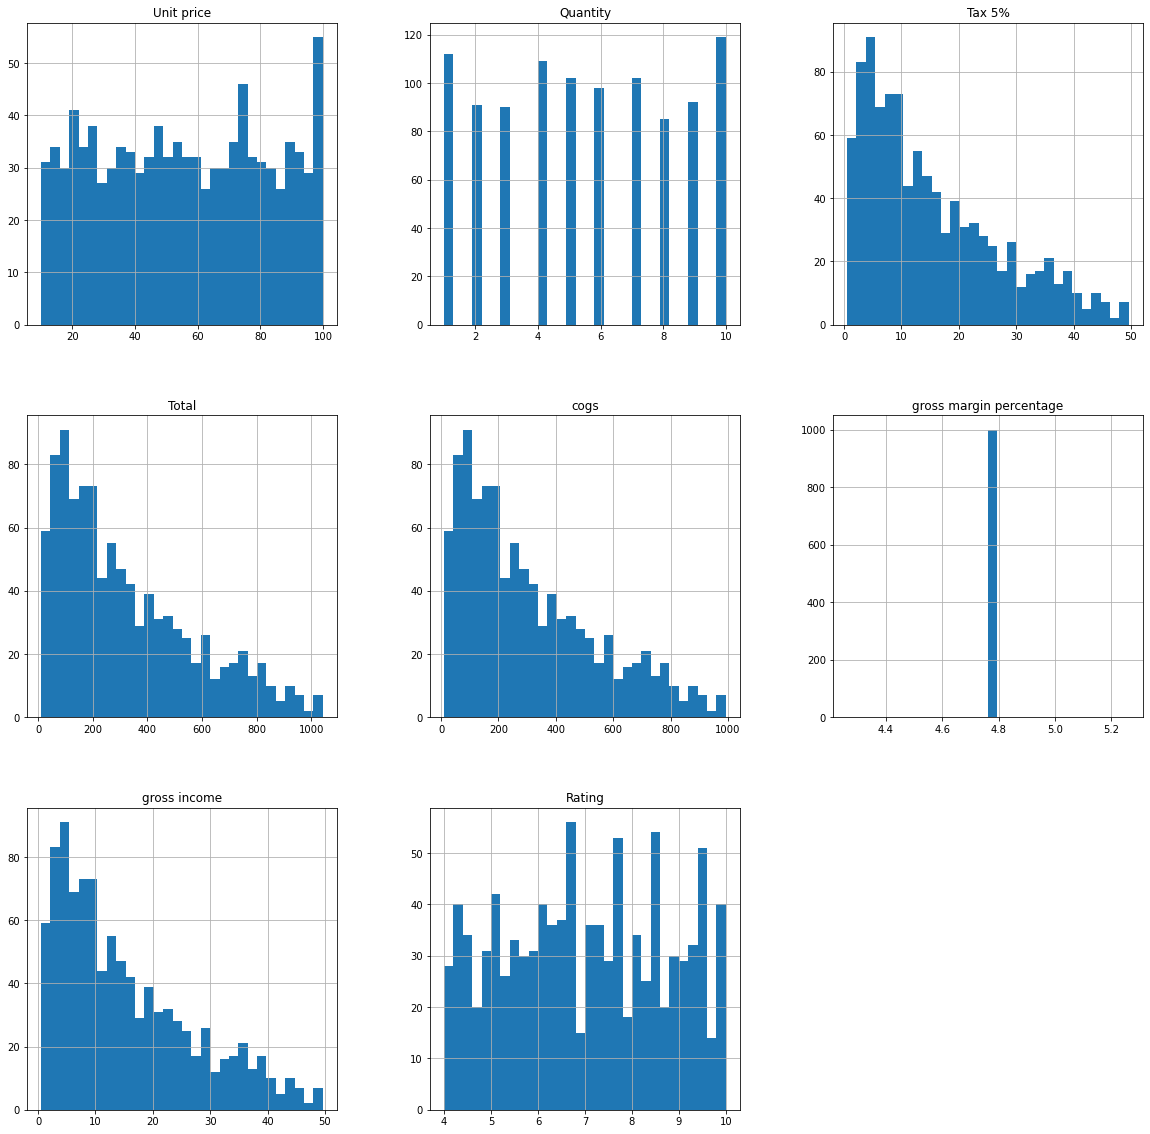

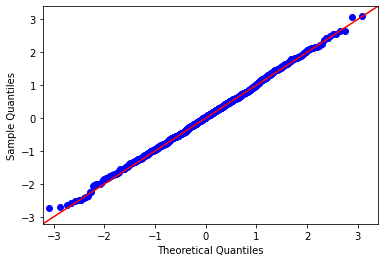

Kolmogorov Smirnov test
0.04313816972596596 0.04697434253358479
Data is not normally distributed

Shapiro Wilk test
Statistics=0.998, p=0.820
Fail to reject H0 that is data is normal distributed

K2 test
K2stat=0.5178, p=0.7719
Fail to reject H0 that is data is normal distributed


In [6]:
def num_col_analysis():
    
    global data
    
    data1 = pd.DataFrame(data)
    
    data1.hist(figsize=(20,20), bins = 30)
    plot.show()
    
    
    data1 = norm.rvs(size=1000)
    sm.qqplot(data1, line='45')
    pylab.show()
    
    print ("Kolmogorov Smirnov test")
    data1 = norm.rvs(size=1000)
    ks_statistic, p_value = kstest(data1, 'norm')
    print(ks_statistic, p_value)
    if p_value > 0.05:
        print ("Normal Distribution")
    else:
        print ("Data is not normally distributed")
        
    print ("\nShapiro Wilk test")   
    data1 = norm.rvs(size=500)
    stat, p = shapiro(data1)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    alpha = 0.05
    if p > alpha:
        print("Fail to reject H0 that is data is normal distributed")
    else:
        print("Reject H0 that is data is normally distributed")    
        
    print ("\nK2 test")
    k2stat, pvalue = normaltest(data1)
    print('K2stat=%.4f, p=%.4f' % (k2stat, pvalue))
    if p > alpha:
        print("Fail to reject H0 that is data is normal distributed")
    else:
        print("Reject H0 that is data is normally distributed")    

        
num_col_analysis()

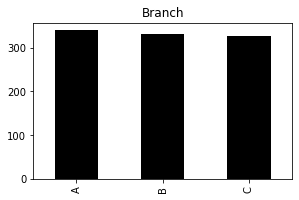

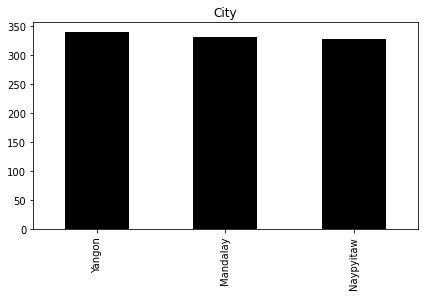

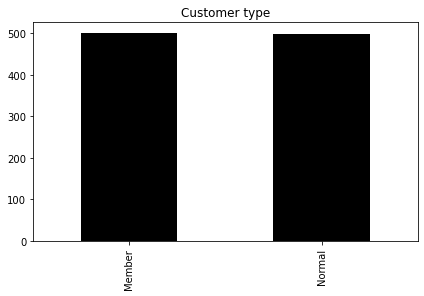

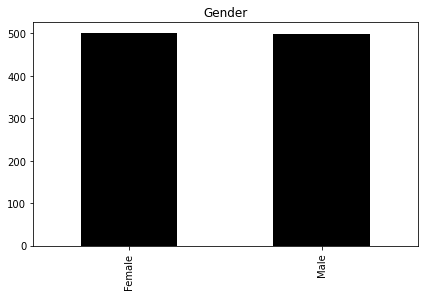

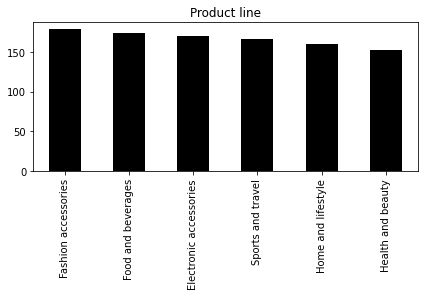

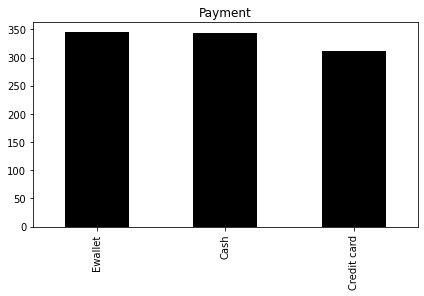

In [7]:
def stringcolanalysis(data):
    stringcols = data.select_dtypes(exclude=[np.number, "datetime64"])
    fig = plt.figure(figsize = (8,10))
    for i,col in enumerate(stringcols):
        fig.add_subplot(4,2,i+1)
        #fig.savefig('Categorical.png')
        data[col].value_counts().plot(kind = 'bar', color='black' ,fontsize=10)
        plt.tight_layout()
        plt.title(col)
        plt.show()
        
stringcolanalysis(data)

<AxesSubplot:xlabel='Product line', ylabel='Unit price'>

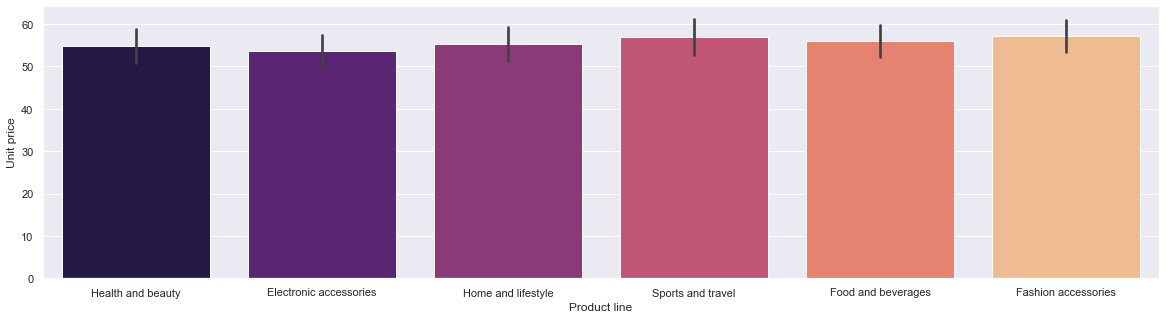

In [8]:
sns.set_theme()
plt.figure(figsize = (20,5))
sns.barplot(x = 'Product line',y = 'Unit price', data = data, palette = 'magma')

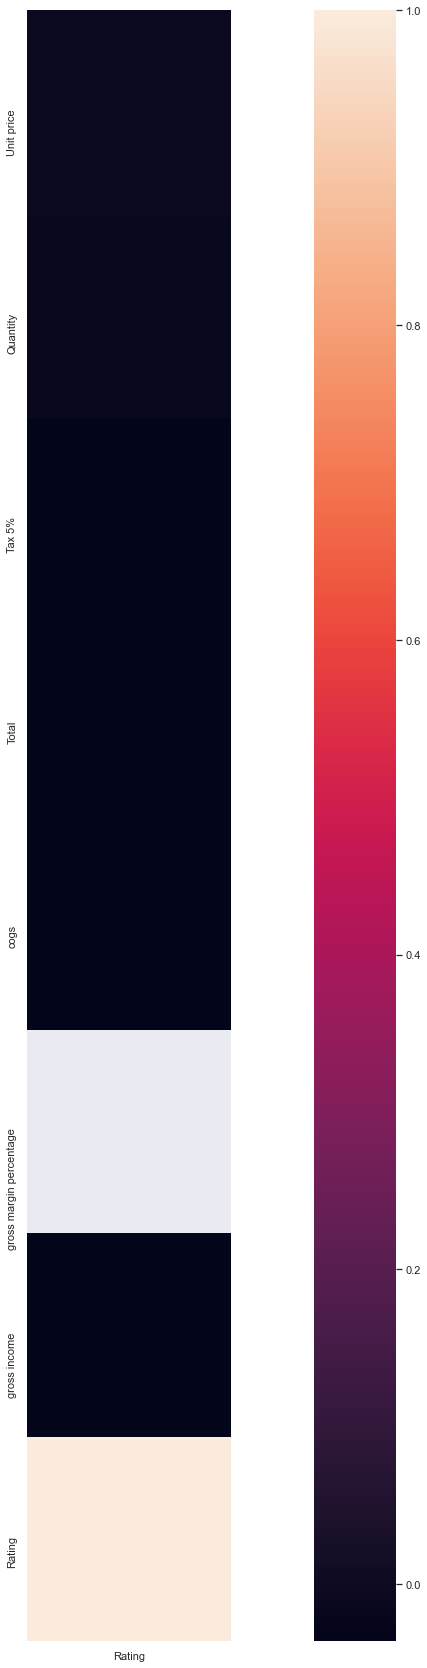

,Rating
Rating,1.000000
Unit price,-0.008778
Quantity,-0.015815
cogs,-0.036442
Tax 5%,-0.036442
gross income,-0.036442
Total,-0.036442
gross margin percentage,NaN


In [9]:
correlation = data.corr()[['Rating']]
plt.subplots(figsize=(30,30))
sns.heatmap(correlation,square=True,fmt="")
plt.show()
correlation.sort_values(by=['Rating'],ascending=False)

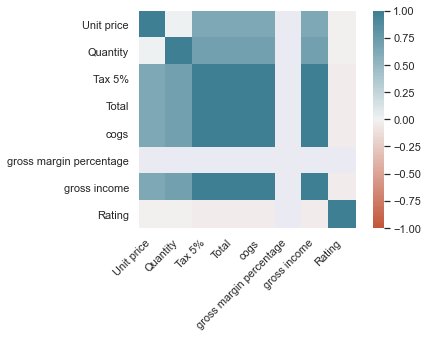

In [10]:
def correlation_anlysis(data):
    # NOTE: If label column is non-numeric, 'encode' it before calling this function 
    #numcols = data.select_dtypes(include=np.number)
    corr = data.corr()
    ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True 
    )
    
    ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')
    
correlation_anlysis(data)

Encode the categorical column for Machine Learning.

In [11]:
num_cols = data.select_dtypes(include = ['int64', 'float64']).columns.tolist()
cat_cols = data.select_dtypes(include = ['object']).columns.tolist()

def label_encoder(data):
    for i in cat_cols:
        le = LabelEncoder()
        data[i] = le.fit_transform(data[i])
    return data

label_encoder(data)


# One-Hot/dummy encoding on specified columns
def onehotencoding(data):
    data = pd.get_dummies(data)
    return data
onehotencoding(data)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,0,2,0,0,3,74.69,7,26.1415,548.9715,2,522.83,4.761905,26.1415,9.1
1,2,1,1,0,0,15.28,5,3.8200,80.2200,0,76.40,4.761905,3.8200,9.6
2,0,2,1,1,4,46.33,7,16.2155,340.5255,1,324.31,4.761905,16.2155,7.4
3,0,2,0,1,3,58.22,8,23.2880,489.0480,2,465.76,4.761905,23.2880,8.4
4,0,2,1,1,5,86.31,7,30.2085,634.3785,2,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2,1,1,1,3,40.35,1,2.0175,42.3675,2,40.35,4.761905,2.0175,6.2
996,1,0,1,0,4,97.38,10,48.6900,1022.4900,2,973.80,4.761905,48.6900,4.4
997,0,2,0,1,2,31.84,1,1.5920,33.4320,0,31.84,4.761905,1.5920,7.7
998,0,2,1,1,4,65.82,1,3.2910,69.1110,0,65.82,4.761905,3.2910,4.1


['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross margin percentage', 'gross income', 'Rating']


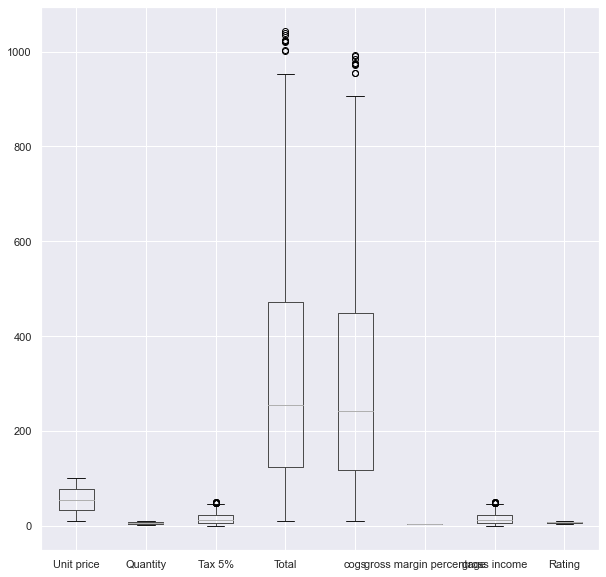

In [12]:
print(num_cols)
df = data.boxplot(figsize = (10,10), column = num_cols[0:8], showfliers=True)

# MACHINE LEARNING FUNCTIONS

In [14]:
def validationmetrics_reg(model,testX,testY, verbose=True):
    global r2, rmse, predictions
    
    predictions = model.predict(testX)
    
    # R-squared
    r2 = r2_score(testY,predictions)
    
    # Adjusted R-squared
    r2_adjusted = 1-(1-r2)*(testX.shape[0]-1)/(testX.shape[0]-testX.shape[1]-1)
    
    # MSE
    mse = mean_squared_error(testY,predictions)
    
    #RMSE
    rmse = math.sqrt(mse)
    
    if verbose:
        print("R-Squared Value: ", r2)
        print("Adjusted R-Squared: ", r2_adjusted)
        print("RMSE: ", rmse)
    
    res_map = {
                "r2": r2,
                "r2_adjusted": r2_adjusted,
                "rmse": rmse,
                "model_obj": model,
              }
    return res_map

In [15]:
def LinearReg(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf  = LinearRegression()
    clf.fit(trainX , trainY)
    return validationmetrics_reg(clf, testX, testY, verbose=verbose)

def RandomForestReg(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = RandomForestRegressor(n_estimators=100)
    clf.fit(trainX , trainY)
    return validationmetrics_reg(clf, testX, testY, verbose=verbose)

def SupportVectorRegression(trainX, testX, trainY, testY, verbose=True, clf=None):
    if not clf:
        clf = SVR(kernel="rbf")
    clf.fit(trainX , trainY)
    return validationmetrics_reg(clf, testX, testY, verbose=verbose)

def VotingReg(trainX, testX, trainY, testY, verbose=True, clf=None):
    lr = LinearRegression()
    rf = RandomForestRegressor(n_estimators=100)
    sv = SVR(kernel="rbf")
    dt = DecisionTreeRegressor()
    gb = GradientBoostingRegressor()
    ab = AdaBoostRegressor(random_state=0, n_estimators=100)
    if not clf:
        clf = VotingRegressor([('rf', rf), ('dt', dt), ('gb', gb), ('ab', ab)])
    clf.fit(trainX , trainY)
    return validationmetrics_reg(clf, testX, testY, verbose=verbose)

# FEATURE SELECTION AND DIMENSIONALITY REDUCTION

- Different Algorithms Predictions Using Random Forest Feature Selection

In [15]:
model= RandomForestRegressor(n_estimators=100,random_state=0)
X=data.drop('Rating',axis=1)
Y=data['Rating']
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

Unit price                 0.284240
Product line               0.107981
Total                      0.091984
cogs                       0.090781
gross income               0.087550
Tax 5%                     0.086634
Payment                    0.061825
Quantity                   0.049525
City                       0.039262
Gender                     0.036573
Customer type              0.032053
Branch                     0.031591
gross margin percentage    0.000000
dtype: float64



..............................................................................
Index(['Unit price'], dtype='object')

 Multi Linear Regression From Random Forest Selection
R-Squared Value:  -0.005051866570265462
Adjusted R-Squared:  -0.008116049090296729
RMSE:  1.7106171944552608

 Voting Regression From Random Forest Selection
R-Squared Value:  -0.2091601730117636
Adjusted R-Squared:  -0.21284663695387263
RMSE:  1.8762923715960467

 Random Forest Regression From Random Forest Selection
R-Squared Value:  -0.4250598009242761
Adjusted R-Squared:  -0.42940449543928905
RMSE:  2.0369254785868134

 Support Vector Regression From Random Forest Selection
R-Squared Value:  -0.024485531038182184
Adjusted R-Squared:  -0.027608962535249804
RMSE:  1.7270762437761835


..............................................................................
Index(['Product line', 'Unit price', 'gross income'], dtype='object')

 Multi Linear Regression From Random Forest Selection
R-Squared Value:  -0.0132910

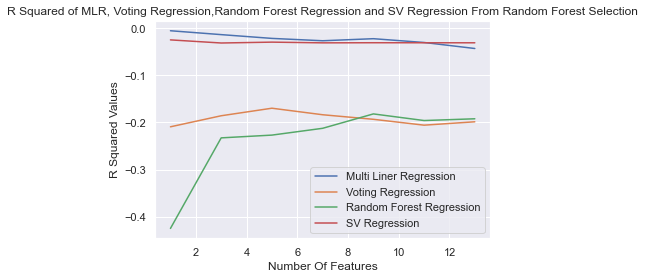

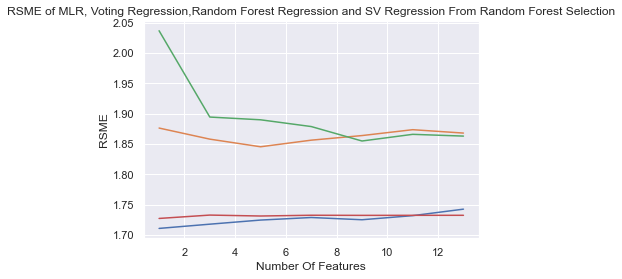

In [17]:
def select_features_RF(X_train, y_train, X_test,n):
    # configure to select a subset of features
    fs = SelectFromModel(RandomForestRegressor(n_estimators=100),threshold=-np.inf, max_features=n)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    selected_feat= X_train.columns[(fs.get_support())]
    print('\n')
    print('..............................................................................')
    print(selected_feat)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 


# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# feature selection
rsqMLR = []
rmseMLR = []
rsqVR = []
rmseVR = []
rsqRF = []
rmseRF = []
rsqSV = []
rmseSV = []
for n in range(1,14,2):
    X_train_fs, X_test_fs, fs = select_features_RF(X_train, y_train, X_test,n)
    # fit the model
    
    print ("\n Multi Linear Regression From Random Forest Selection")
    LinearReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqMLR.append(r2)
    rmseMLR.append(rmse)
    
    print ("\n Voting Regression From Random Forest Selection")
    VotingReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqVR.append(r2)
    rmseVR.append(rmse)
    
    print("\n Random Forest Regression From Random Forest Selection")
    RandomForestReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqRF.append(r2)
    rmseRF.append(rmse)
    
    print("\n Support Vector Regression From Random Forest Selection")
    SupportVectorRegression(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqSV.append(r2)
    rmseSV.append(rmse)


x = [1,3,5,7,9,11,13]
y1 = rsqMLR
plt.plot(x, y1,label = "Multi Liner Regression")
y2 = rsqVR
plt.plot(x, y2,label = "Voting Regression")
y3 = rsqRF
plt.plot(x, y3,label = "Random Forest Regression")
y4 = rsqSV
plt.plot(x, y4,label = "SV Regression")

plt.xlabel('Number Of Features')
plt.ylabel('R Squared Values')
plt.title('R Squared of MLR, Voting Regression,Random Forest Regression and SV Regression From Random Forest Selection')
plt.legend()
plt.show()


x1 = [1,3,5,7,9,11,13]
y5 = rmseMLR
plt.plot(x1, y5,label = "Multi Liner Regression")
y6 = rmseVR
plt.plot(x1, y6,label = "Voting Regression")
y7 = rmseRF
plt.plot(x, y7,label = "Random Forest Regression")
y8 = rmseSV
plt.plot(x, y8,label = "SV Regression")

plt.xlabel('Number Of Features')
plt.ylabel('RSME')
plt.title('RSME of MLR, Voting Regression,Random Forest Regression and SV Regression From Random Forest Selection')
plt.show()


#### Interpretation
SV and MLR gives minimum RSME and remains constant with the number of features. 

- Different Algorithms Predictions Using XGB Feature Selection

In [18]:
from xgboost import XGBRegressor
model= XGBRegressor(n_estimators=100,random_state=0)
model.fit(X,Y)
pd.Series(model.feature_importances_,index=X.columns).sort_values(ascending=False)

Tax 5%                     0.171687
Unit price                 0.144350
Quantity                   0.136836
Payment                    0.128940
Product line               0.096187
Gender                     0.096155
City                       0.092155
Branch                     0.069572
Customer type              0.064119
Total                      0.000000
cogs                       0.000000
gross margin percentage    0.000000
gross income               0.000000
dtype: float32



..............................................................................
Index(['Tax 5%'], dtype='object')


C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(



 Multi Linear Regression From XGBoost Selection
R-Squared Value:  -0.014402604361449134
Adjusted R-Squared:  -0.01749529522840465
RMSE:  1.7185563371463775

 Voting Regression From XGBoost Selection
R-Squared Value:  -0.281237125694463
Adjusted R-Squared:  -0.2851433364435314
RMSE:  1.931405007600855

 Random Forest Regression From XGBoost Selection
R-Squared Value:  -0.5971316425700883
Adjusted R-Squared:  -0.6020009463584117
RMSE:  2.156398161401115

 Support Vector Regression From XGBoost Selection
R-Squared Value:  -0.024419232949845826
Adjusted R-Squared:  -0.027542462318595362
RMSE:  1.7270203602607899


..............................................................................
Index(['Unit price', 'Tax 5%', 'Payment'], dtype='object')

 Multi Linear Regression From XGBoost Selection
R-Squared Value:  -0.01543349255369364
Adjusted R-Squared:  -0.024777972546518923
RMSE:  1.719429358148494

 Voting Regression From XGBoost Selection


C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


R-Squared Value:  -0.18350070850777334
Adjusted R-Squared:  -0.19439181932226202
RMSE:  1.8562773134623936

 Random Forest Regression From XGBoost Selection
R-Squared Value:  -0.3207615623840143
Adjusted R-Squared:  -0.33291580989061553
RMSE:  1.9609693536770554

 Support Vector Regression From XGBoost Selection
R-Squared Value:  -0.03168211510608532
Adjusted R-Squared:  -0.04117612230031309
RMSE:  1.7331316238226708


..............................................................................
Index(['Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Payment'], dtype='object')

 Multi Linear Regression From XGBoost Selection
R-Squared Value:  -0.02011225208585321
Adjusted R-Squared:  -0.03585472511186949
RMSE:  1.7233860677458

 Voting Regression From XGBoost Selection


C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


R-Squared Value:  -0.2324775194478832
Adjusted R-Squared:  -0.2514972342541777
RMSE:  1.894297120293494

 Random Forest Regression From XGBoost Selection
R-Squared Value:  -0.19336239602370098
Adjusted R-Squared:  -0.2117784823820914
RMSE:  1.8639951163936548

 Support Vector Regression From XGBoost Selection
R-Squared Value:  -0.031131462294671453
Adjusted R-Squared:  -0.047043984860947186
RMSE:  1.7326690389013684


..............................................................................
Index(['City', 'Gender', 'Product line', 'Unit price', 'Quantity', 'Tax 5%',
       'Payment'],
      dtype='object')

 Multi Linear Regression From XGBoost Selection
R-Squared Value:  -0.029927375588065575
Adjusted R-Squared:  -0.05231710114432797
RMSE:  1.731657095592148

 Voting Regression From XGBoost Selection


C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


R-Squared Value:  -0.20147325741787703
Adjusted R-Squared:  -0.2275922412747875
RMSE:  1.8703188467445089

 Random Forest Regression From XGBoost Selection
R-Squared Value:  -0.17706334193142426
Adjusted R-Squared:  -0.2026516754516725
RMSE:  1.8512220435554063

 Support Vector Regression From XGBoost Selection
R-Squared Value:  -0.030979625211283057
Adjusted R-Squared:  -0.05339222575935443
RMSE:  1.7325414639467551


..............................................................................
Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Payment'],
      dtype='object')

 Multi Linear Regression From XGBoost Selection
R-Squared Value:  -0.04276182856064925
Adjusted R-Squared:  -0.07208950498891764
RMSE:  1.7424132232976128

 Voting Regression From XGBoost Selection


C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


R-Squared Value:  -0.1855091589795066
Adjusted R-Squared:  -0.21885160407580528
RMSE:  1.8578517361113893

 Random Forest Regression From XGBoost Selection
R-Squared Value:  -0.20157806615121876
Adjusted R-Squared:  -0.23537244926172174
RMSE:  1.8704004222074855

 Support Vector Regression From XGBoost Selection
R-Squared Value:  -0.030933954073406378
Adjusted R-Squared:  -0.05992897153172083
RMSE:  1.7325030887866304


..............................................................................
Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment', 'cogs'],
      dtype='object')

 Multi Linear Regression From XGBoost Selection
R-Squared Value:  -0.041824342563711925
Adjusted R-Squared:  -0.0778622915203182
RMSE:  1.7416297964107568

 Voting Regression From XGBoost Selection


C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


R-Squared Value:  -0.19931865712724206
Adjusted R-Squared:  -0.24080452262535412
RMSE:  1.8686410741509027

 Random Forest Regression From XGBoost Selection
R-Squared Value:  -0.17695601736615885
Adjusted R-Squared:  -0.21766833243228367
RMSE:  1.851137644473765

 Support Vector Regression From XGBoost Selection
R-Squared Value:  -0.030622208622708813
Adjusted R-Squared:  -0.06627266238009821
RMSE:  1.7322411220570113


..............................................................................
Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment', 'cogs',
       'gross margin percentage', 'gross income'],
      dtype='object')

 Multi Linear Regression From XGBoost Selection
R-Squared Value:  -0.042762660792573515
Adjusted R-Squared:  -0.0856611246859389
RMSE:  1.7424139186105696

 Voting Regression From XGBoost Selection


C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


R-Squared Value:  -0.20119143824352803
Adjusted R-Squared:  -0.250607541715572
RMSE:  1.870099481634897

 Random Forest Regression From XGBoost Selection
R-Squared Value:  -0.17922573151475718
Adjusted R-Squared:  -0.2277381824947946
RMSE:  1.8529217084312435

 Support Vector Regression From XGBoost Selection
R-Squared Value:  -0.03065190229153769
Adjusted R-Squared:  -0.07305213877821481
RMSE:  1.732266076023312


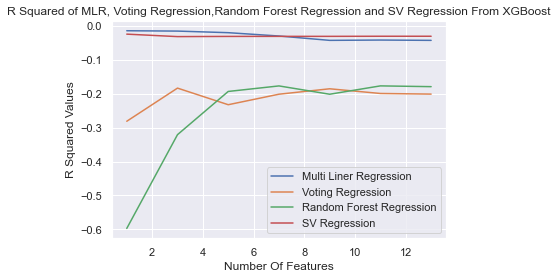

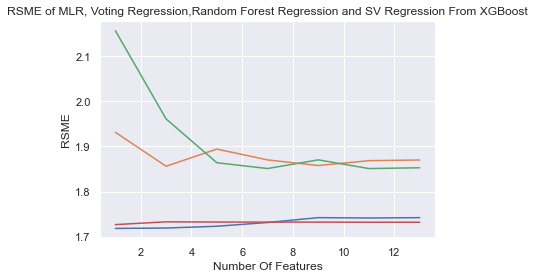

In [19]:
def select_features_XGB(X_train, y_train, X_test,n):
    # configure to select a subset of features
    fs = SelectFromModel(XGBRegressor(n_estimators=100),threshold=-np.inf, max_features=n)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    selected_feat= X_train.columns[(fs.get_support())]
    print('\n')
    print('..............................................................................')
    print(selected_feat)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# feature selection
rsqMLR = []
rmseMLR = []
rsqVR = []
rmseVR = []
rsqRF = []
rmseRF = []
rsqSV = []
rmseSV = []
for n in range(1,14,2):
    X_train_fs, X_test_fs, fs = select_features_XGB(X_train, y_train, X_test,n)
    # fit the model
    
    print ("\n Multi Linear Regression From XGBoost Selection")
    LinearReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqMLR.append(r2)
    rmseMLR.append(rmse)
    
    print ("\n Voting Regression From XGBoost Selection")
    VotingReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqVR.append(r2)
    rmseVR.append(rmse)
    
    print("\n Random Forest Regression From XGBoost Selection")
    RandomForestReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqRF.append(r2)
    rmseRF.append(rmse)
    
    print("\n Support Vector Regression From XGBoost Selection")
    SupportVectorRegression(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqSV.append(r2)
    rmseSV.append(rmse)


x = [1,3,5,7,9,11,13]
y1 = rsqMLR
plt.plot(x, y1,label = "Multi Liner Regression")
y2 = rsqVR
plt.plot(x, y2,label = "Voting Regression")
y3 = rsqRF
plt.plot(x, y3,label = "Random Forest Regression")
y4 = rsqSV
plt.plot(x, y4,label = "SV Regression")

plt.xlabel('Number Of Features')
plt.ylabel('R Squared Values')
plt.title('R Squared of MLR, Voting Regression,Random Forest Regression and SV Regression From XGBoost')
plt.legend()
plt.show()


x1 = [1,3,5,7,9,11,13]
y5 = rmseMLR
plt.plot(x1, y5,label = "Multi Liner Regression")
y6 = rmseVR
plt.plot(x1, y6,label = "Voting Regression")
y7 = rmseRF
plt.plot(x, y7,label = "Random Forest Regression")
y8 = rmseSV
plt.plot(x, y8,label = "SV Regression")

plt.xlabel('Number Of Features')
plt.ylabel('RSME')
plt.title('RSME of MLR, Voting Regression,Random Forest Regression and SV Regression From XGBoost')
plt.show()


#### Interpretation
Random Forest Regression performs well with 4 features the RSME is lowest.

- Different Algorithms Predictions Using Recursive Forest Feature Selection

In [20]:
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor

Index(['gross income'], dtype='object')

 Multi Linear Regression From RFE Selection
R-Squared Value:  -0.014402604361449134
Adjusted R-Squared:  -0.01749529522840465
RMSE:  1.7185563371463775

 Voting Regression From RFE Selection
R-Squared Value:  -0.27946602561214395
Adjusted R-Squared:  -0.2833668366658395
RMSE:  1.9300696207079056

 Random Forest Regression From RFE Selection
R-Squared Value:  -0.5911731282883892
Adjusted R-Squared:  -0.5960242658746342
RMSE:  2.1523719010188405

 Support Vector Regression From RFE Selection
R-Squared Value:  -0.024419232949845826
Adjusted R-Squared:  -0.027542462318595362
RMSE:  1.7270203602607899
Index(['Unit price', 'Total', 'gross income'], dtype='object')

 Multi Linear Regression From RFE Selection
R-Squared Value:  -0.01402473794064063
Adjusted R-Squared:  -0.023356253933959348
RMSE:  1.7182362249864056

 Voting Regression From RFE Selection
R-Squared Value:  -0.21351339747597353
Adjusted R-Squared:  -0.22468069867974028
RMSE:  1.8796668556

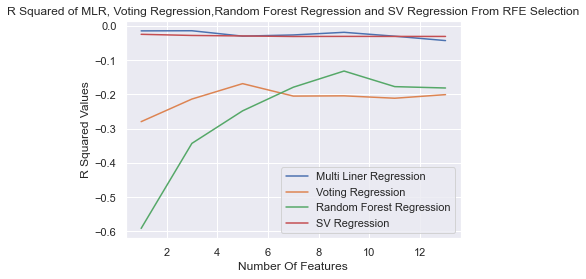

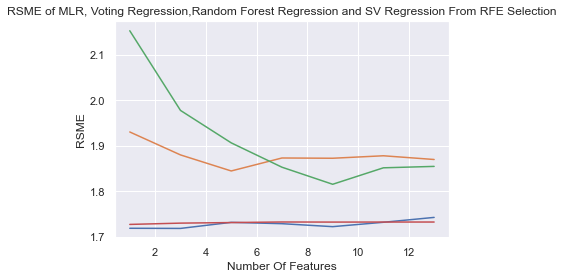

In [21]:
def select_features_RFE(X_train, y_train, X_test,n):
    # configure to select a subset of features
    fs = RFE(estimator = DecisionTreeRegressor(), n_features_to_select = n)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    selected_feat= X_train.columns[(fs.get_support())]
    print(selected_feat)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 


# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# feature selection
rsqMLR = []
rmseMLR = []
rsqVR = []
rmseVR = []
rsqRF = []
rmseRF = []
rsqSV = []
rmseSV = []
for n in range(1,14,2):
    X_train_fs, X_test_fs, fs = select_features_RFE(X_train, y_train, X_test,n)
    # fit the model
    
    print ("\n Multi Linear Regression From RFE Selection")
    LinearReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqMLR.append(r2)
    rmseMLR.append(rmse)
    
    print ("\n Voting Regression From RFE Selection")
    VotingReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqVR.append(r2)
    rmseVR.append(rmse)
    
    print("\n Random Forest Regression From RFE Selection")
    RandomForestReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqRF.append(r2)
    rmseRF.append(rmse)
    
    print("\n Support Vector Regression From RFE Selection")
    SupportVectorRegression(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqSV.append(r2)
    rmseSV.append(rmse)


x = [1,3,5,7,9,11,13]
y1 = rsqMLR
plt.plot(x, y1,label = "Multi Liner Regression")
y2 = rsqVR
plt.plot(x, y2,label = "Voting Regression")
y3 = rsqRF
plt.plot(x, y3,label = "Random Forest Regression")
y4 = rsqSV
plt.plot(x, y4,label = "SV Regression")

plt.xlabel('Number Of Features')
plt.ylabel('R Squared Values')
plt.title('R Squared of MLR, Voting Regression,Random Forest Regression and SV Regression From RFE Selection')
plt.legend()
plt.show()


x1 = [1,3,5,7,9,11,13]
y5 = rmseMLR
plt.plot(x1, y5,label = "Multi Liner Regression")
y6 = rmseVR
plt.plot(x1, y6,label = "Voting Regression")
y7 = rmseRF
plt.plot(x, y7,label = "Random Forest Regression")
y8 = rmseSV
plt.plot(x, y8,label = "SV Regression")

plt.xlabel('Number Of Features')
plt.ylabel('RSME')
plt.title('RSME of MLR, Voting Regression,Random Forest Regression and SV Regression From RFE Selection')
plt.show()


#### Interpretation
RF regression perform well on high number of features (8) but Voting regression performs well on less features.

- Different Algorithms Predictions Using Lasso

In [1]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Index(['Branch'], dtype='object')

 Multi Linear Regression From Lasso
R-Squared Value:  -0.0007050018968877136
Adjusted R-Squared:  -0.0037559317807196457
RMSE:  1.7069139632370975

 Voting Regression From Lasso
R-Squared Value:  -0.01245782095228587
Adjusted R-Squared:  -0.015544582601530577
RMSE:  1.7169081634936825

 Random Forest Regression From Lasso
R-Squared Value:  -0.014586310112316925
Adjusted R-Squared:  -0.017679561057781346
RMSE:  1.7187119432088767

 Support Vector Regression From Lasso
R-Squared Value:  -0.028566072903385864
Adjusted R-Squared:  -0.03170194507687185
RMSE:  1.7305123115202181


C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Index(['Branch', 'City', 'Customer type'], dtype='object')

 Multi Linear Regression From Lasso
R-Squared Value:  -0.015853892876396714
Adjusted R-Squared:  -0.025202241583848206
RMSE:  1.7197852523853132

 Voting Regression From Lasso
R-Squared Value:  -0.020193896320743754
Adjusted R-Squared:  -0.029582183710198606
RMSE:  1.7234550315884758

 Random Forest Regression From Lasso
R-Squared Value:  -0.01952616501835558
Adjusted R-Squared:  -0.028908307641223763
RMSE:  1.7228909264496595

 Support Vector Regression From Lasso
R-Squared Value:  -0.05339343629079085
Adjusted R-Squared:  -0.06308724091923357
RMSE:  1.7512731925489486


C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line'], dtype='object')

 Multi Linear Regression From Lasso
R-Squared Value:  -0.01738566662532448
Adjusted R-Squared:  -0.03308606271522141
RMSE:  1.7210813686956008

 Voting Regression From Lasso
R-Squared Value:  -0.08081984380688945
Adjusted R-Squared:  -0.09749916238415612
RMSE:  1.7739249852967445

 Random Forest Regression From Lasso
R-Squared Value:  -0.13205069477739917
Adjusted R-Squared:  -0.14952061290667995
RMSE:  1.8154802704761406

 Support Vector Regression From Lasso
R-Squared Value:  -0.09422899209081126
Adjusted R-Squared:  -0.111115241968756
RMSE:  1.7848951298037565


C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity'],
      dtype='object')

 Multi Linear Regression From Lasso
R-Squared Value:  -0.025799512997337626
Adjusted R-Squared:  -0.048099502410323236
RMSE:  1.7281834433269105

 Voting Regression From Lasso
R-Squared Value:  -0.2020758222300778
Adjusted R-Squared:  -0.22820790532203605
RMSE:  1.8707877906227255

 Random Forest Regression From Lasso
R-Squared Value:  -0.19711584225932977
Adjusted R-Squared:  -0.22314009969975013
RMSE:  1.8669241984209834

 Support Vector Regression From Lasso
R-Squared Value:  -0.023447643372640048
Adjusted R-Squared:  -0.04569650518508883
RMSE:  1.726201187322595


C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total'],
      dtype='object')

 Multi Linear Regression From Lasso
R-Squared Value:  -0.040458634512171354
Adjusted R-Squared:  -0.06972153360782629
RMSE:  1.740487887092824

 Voting Regression From Lasso
R-Squared Value:  -0.2456001307080229
Adjusted R-Squared:  -0.28063263438418606
RMSE:  1.9043550345409728

 Random Forest Regression From Lasso
R-Squared Value:  -0.22326731177249948
Adjusted R-Squared:  -0.25767170491610103
RMSE:  1.8872058806019603

 Support Vector Regression From Lasso
R-Squared Value:  -0.03185461737447737
Adjusted R-Squared:  -0.0608755284881346
RMSE:  1.7332765117857


C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment', 'cogs'],
      dtype='object')

 Multi Linear Regression From Lasso
R-Squared Value:  -0.041824342563711925
Adjusted R-Squared:  -0.0778622915203182
RMSE:  1.7416297964107568

 Voting Regression From Lasso
R-Squared Value:  -0.21150050713926016
Adjusted R-Squared:  -0.2534077573862157
RMSE:  1.8781072793517464

 Random Forest Regression From Lasso
R-Squared Value:  -0.18447672406310645
Adjusted R-Squared:  -0.22544918936088676
RMSE:  1.8570425779619693

 Support Vector Regression From Lasso
R-Squared Value:  -0.030622208622708813
Adjusted R-Squared:  -0.06627266238009821
RMSE:  1.7322411220570113


C:\Users\Hp\anaconda\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Payment', 'cogs',
       'gross margin percentage', 'gross income'],
      dtype='object')

 Multi Linear Regression From Lasso
R-Squared Value:  -0.042762660792573515
Adjusted R-Squared:  -0.0856611246859389
RMSE:  1.7424139186105696

 Voting Regression From Lasso
R-Squared Value:  -0.2034962589219831
Adjusted R-Squared:  -0.253007180966242
RMSE:  1.871892775442588

 Random Forest Regression From Lasso
R-Squared Value:  -0.1637410939049777
Adjusted R-Squared:  -0.21161651865423314
RMSE:  1.8407159731852698

 Support Vector Regression From Lasso
R-Squared Value:  -0.03065190229153769
Adjusted R-Squared:  -0.07305213877821481
RMSE:  1.732266076023312


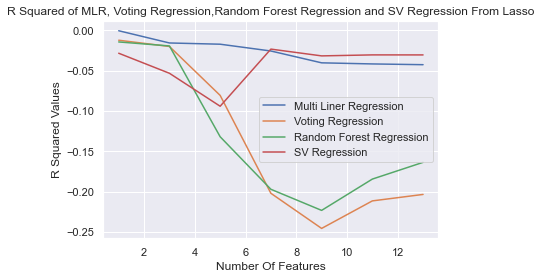

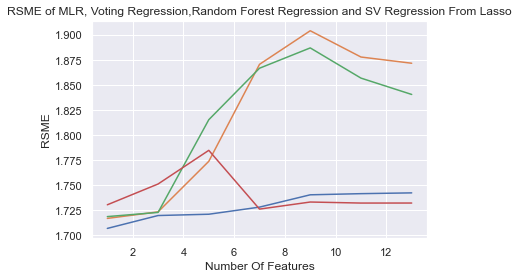

In [23]:
def select_features_Lasso(X_train, y_train, X_test,n):
    # configure to select a subset of features
    # Use L1 penalty
    estimator = LassoCV(cv=5, normalize = True)
    fs = SelectFromModel(estimator,threshold=-np.inf, max_features=n)
    # learn relationship from training data
    fs.fit(X_train, y_train)
    selected_feat= X_train.columns[(fs.get_support())]
    print(selected_feat)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# feature selection
rsqMLR = []
rmseMLR = []
rsqVR = []
rmseVR = []
rsqRF = []
rmseRF = []
rsqSV = []
rmseSV = []
for n in range(1,14,2):
    X_train_fs, X_test_fs, fs = select_features_Lasso(X_train, y_train, X_test,n)
    # fit the model
    
    print ("\n Multi Linear Regression From Lasso")
    LinearReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqMLR.append(r2)
    rmseMLR.append(rmse)
    
    print ("\n Voting Regression From Lasso")
    VotingReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqVR.append(r2)
    rmseVR.append(rmse)
    
    print("\n Random Forest Regression From Lasso")
    RandomForestReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqRF.append(r2)
    rmseRF.append(rmse)
    
    print("\n Support Vector Regression From Lasso")
    SupportVectorRegression(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqSV.append(r2)
    rmseSV.append(rmse)


x = [1,3,5,7,9,11,13]
y1 = rsqMLR
plt.plot(x, y1,label = "Multi Liner Regression")
y2 = rsqVR
plt.plot(x, y2,label = "Voting Regression")
y3 = rsqRF
plt.plot(x, y3,label = "Random Forest Regression")
y4 = rsqSV
plt.plot(x, y4,label = "SV Regression")

plt.xlabel('Number Of Features')
plt.ylabel('R Squared Values')
plt.title('R Squared of MLR, Voting Regression,Random Forest Regression and SV Regression From Lasso')
plt.legend()
plt.show()


x1 = [1,3,5,7,9,11,13]
y5 = rmseMLR
plt.plot(x1, y5,label = "Multi Liner Regression")
y6 = rmseVR
plt.plot(x1, y6,label = "Voting Regression")
y7 = rmseRF
plt.plot(x, y7,label = "Random Forest Regression")
y8 = rmseSV
plt.plot(x, y8,label = "SV Regression")

plt.xlabel('Number Of Features')
plt.ylabel('RSME')
plt.title('RSME of MLR, Voting Regression,Random Forest Regression and SV Regression From Lasso')
plt.show()


#### Interpretation
MLR performs well among all algorithms on less and more features

- Different Algorithms Predictions Using PCA

[4.10525138e-01 1.26846501e-01 8.95658826e-02 8.67944202e-02
 8.33601810e-02 8.06665818e-02 7.49316352e-02 3.96538941e-02
 7.65576682e-03 5.29031102e-33 3.11074739e-33 1.20531214e-33
 8.03933547e-69]


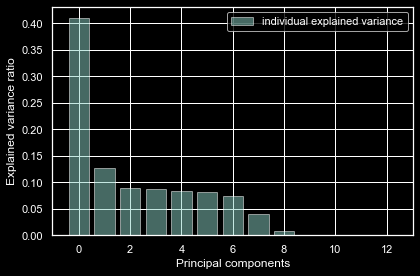

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
pca = PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print(explained_variance)
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(13), explained_variance, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

Explained Variance Ratio of  1  Components:
[0.41052514]


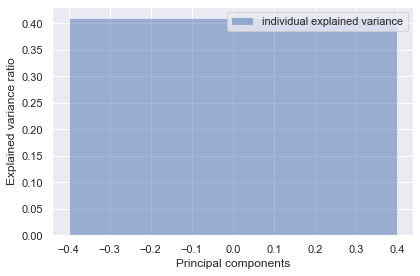


 Multi Linear Regression From PCA
R-Squared Value:  -0.012903167893632217
Adjusted R-Squared:  -0.01599128730794197
RMSE:  1.7172857277334297

 Voting Regression From PCA
R-Squared Value:  -0.17727882167210374
Adjusted R-Squared:  -0.18086808637232354
RMSE:  1.8513914832860887

 Random Forest Regression From PCA
R-Squared Value:  -0.37687832161493473
Adjusted R-Squared:  -0.3810761213759559
RMSE:  2.0021950204712833

 Support Vector Regression From PCA
R-Squared Value:  -0.01957985727058653
Adjusted R-Squared:  -0.022688332445192083
RMSE:  1.7229362929539556
Explained Variance Ratio of  3  Components:
[0.41052514 0.1268465  0.08956588]


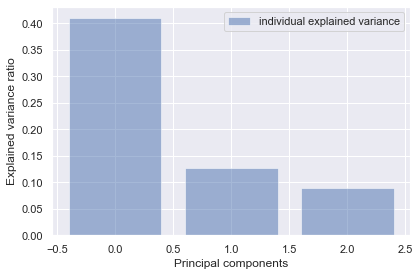


 Multi Linear Regression From PCA
R-Squared Value:  -0.01232236403030873
Adjusted R-Squared:  -0.021638214006047596
RMSE:  1.7167933069190922

 Voting Regression From PCA
R-Squared Value:  -0.05575689044329257
Adjusted R-Squared:  -0.06547244464982582
RMSE:  1.7532367204685906

 Random Forest Regression From PCA
R-Squared Value:  -0.05583186022799791
Adjusted R-Squared:  -0.06554810434052549
RMSE:  1.7532989684384326

 Support Vector Regression From PCA
R-Squared Value:  -0.027487382609361344
Adjusted R-Squared:  -0.03694278797079731
RMSE:  1.7296046515488592
Explained Variance Ratio of  5  Components:
[0.41052514 0.1268465  0.08956588 0.08679442 0.08336018]


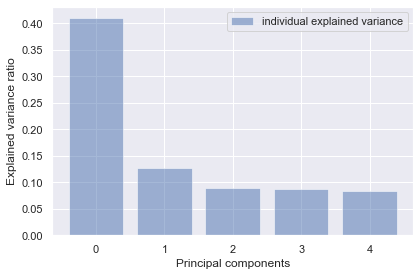


 Multi Linear Regression From PCA
R-Squared Value:  -0.016065689412983142
Adjusted R-Squared:  -0.031745715484171155
RMSE:  1.7199645230359548

 Voting Regression From PCA
R-Squared Value:  -0.08429528241684903
Adjusted R-Squared:  -0.10102823430599783
RMSE:  1.7767747753241048

 Random Forest Regression From PCA
R-Squared Value:  -0.04946916120423417
Adjusted R-Squared:  -0.06566467295121314
RMSE:  1.748008082811907

 Support Vector Regression From PCA
R-Squared Value:  -0.07860257653200642
Adjusted R-Squared:  -0.09524767802169798
RMSE:  1.7721044760071751
Explained Variance Ratio of  7  Components:
[0.41052514 0.1268465  0.08956588 0.08679442 0.08336018 0.08066658
 0.07493164]


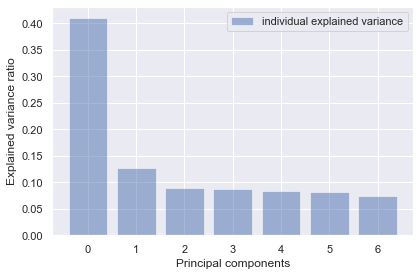


 Multi Linear Regression From PCA
R-Squared Value:  -0.01854581111048592
Adjusted R-Squared:  -0.04068811135201811
RMSE:  1.7220623802374662

 Voting Regression From PCA
R-Squared Value:  -0.061829192299363456
Adjusted R-Squared:  -0.0849124356102191
RMSE:  1.7582714582862085

 Random Forest Regression From PCA
R-Squared Value:  -0.07594432888718794
Adjusted R-Squared:  -0.0993344229934312
RMSE:  1.7699194272022327

 Support Vector Regression From PCA
R-Squared Value:  -0.12714192686214676
Adjusted R-Squared:  -0.15164501222871518
RMSE:  1.8115398758047934
Explained Variance Ratio of  9  Components:
[0.41052514 0.1268465  0.08956588 0.08679442 0.08336018 0.08066658
 0.07493164 0.03965389 0.00765577]


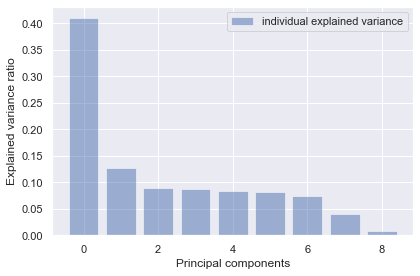


 Multi Linear Regression From PCA
R-Squared Value:  -0.04276182856064925
Adjusted R-Squared:  -0.07208950498891764
RMSE:  1.7424132232976128

 Voting Regression From PCA
R-Squared Value:  -0.1344269215337972
Adjusted R-Squared:  -0.16633267870193524
RMSE:  1.817384660168906

 Random Forest Regression From PCA
R-Squared Value:  -0.07865850997140522
Adjusted R-Squared:  -0.10899578056435089
RMSE:  1.7721504237063017

 Support Vector Regression From PCA
R-Squared Value:  -0.16939078259648288
Adjusted R-Squared:  -0.20227989835700888
RMSE:  1.845178684466574
Explained Variance Ratio of  11  Components:
[4.10525138e-01 1.26846501e-01 8.95658826e-02 8.67944202e-02
 8.33601810e-02 8.06665818e-02 7.49316352e-02 3.96538941e-02
 7.65576682e-03 5.29031102e-33 3.11074739e-33]


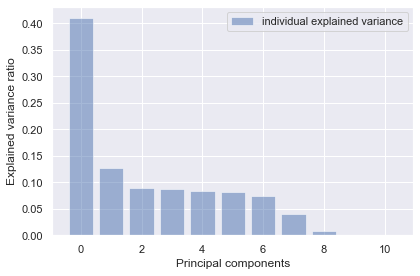


 Multi Linear Regression From PCA
R-Squared Value:  -0.04276182856064925
Adjusted R-Squared:  -0.07883220627815613
RMSE:  1.7424132232976128

 Voting Regression From PCA
R-Squared Value:  -0.12508708096448395
Adjusted R-Squared:  -0.16400518753872695
RMSE:  1.8098878507597533

 Random Forest Regression From PCA
R-Squared Value:  -0.0976798124181395
Adjusted R-Squared:  -0.1356498688225405
RMSE:  1.7877073857233174

 Support Vector Regression From PCA
R-Squared Value:  -0.16939078259648355
Adjusted R-Squared:  -0.20984140715170785
RMSE:  1.8451786844665747
Explained Variance Ratio of  13  Components:
[4.10525138e-01 1.26846501e-01 8.95658826e-02 8.67944202e-02
 8.33601810e-02 8.06665818e-02 7.49316352e-02 3.96538941e-02
 7.65576682e-03 5.29031102e-33 3.11074739e-33 1.20531214e-33
 8.03933547e-69]


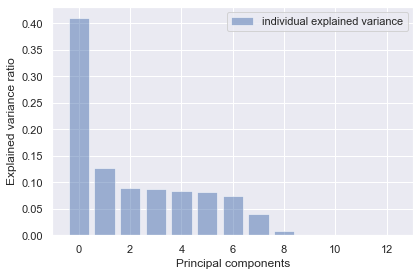


 Multi Linear Regression From PCA
R-Squared Value:  -0.04276182856064925
Adjusted R-Squared:  -0.08566025821662548
RMSE:  1.7424132232976128

 Voting Regression From PCA
R-Squared Value:  -0.12013753758142953
Adjusted R-Squared:  -0.16621914514015912
RMSE:  1.8059023848445945

 Random Forest Regression From PCA
R-Squared Value:  -0.07328256268225153
Adjusted R-Squared:  -0.11743659215968583
RMSE:  1.7677287799303205

 Support Vector Regression From PCA
R-Squared Value:  -0.16939078259648355
Adjusted R-Squared:  -0.2174986312476046
RMSE:  1.8451786844665747


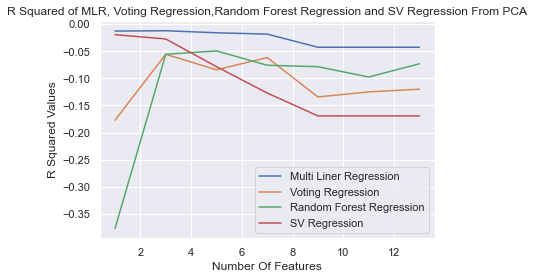

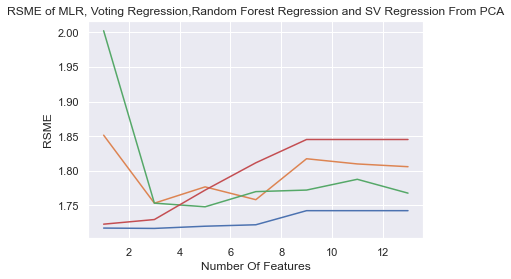

In [25]:
from sklearn.decomposition import PCA
def select_features_pca(X_train, X_test,n):
    global pca
    # configure to select a subset of features
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    pca = PCA(n_components = n)
    X_train_fs = pca.fit_transform(X_train)
    X_test_fs = pca.transform(X_test)
    return X_train_fs, X_test_fs
 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# feature selection
rsqMLR = []
rmseMLR = []
rsqVR = []
rmseVR = []
rsqRF = []
rmseRF = []
rsqSV = []
rmseSV = []

for n in range(1,14,2):
    X_train_fs, X_test_fs = select_features_pca(X_train, X_test,n)
    print ("Explained Variance Ratio of ",n," Components:")
    explained_variance = pca.explained_variance_ratio_
    print(explained_variance)
    
    plt.figure(figsize=(6, 4))
    plt.bar(range(n), explained_variance, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
    # fit the model
    
    print ("\n Multi Linear Regression From PCA")
    LinearReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqMLR.append(r2)
    rmseMLR.append(rmse)
    
    print ("\n Voting Regression From PCA")
    VotingReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqVR.append(r2)
    rmseVR.append(rmse)
    
    print("\n Random Forest Regression From PCA")
    RandomForestReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqRF.append(r2)
    rmseRF.append(rmse)
    
    print("\n Support Vector Regression From PCA")
    SupportVectorRegression(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqSV.append(r2)
    rmseSV.append(rmse)


x = [1,3,5,7,9,11,13]
y1 = rsqMLR
plt.plot(x, y1,label = "Multi Liner Regression")
y2 = rsqVR
plt.plot(x, y2,label = "Voting Regression")
y3 = rsqRF
plt.plot(x, y3,label = "Random Forest Regression")
y4 = rsqSV
plt.plot(x, y4,label = "SV Regression")

plt.xlabel('Number Of Features')
plt.ylabel('R Squared Values')
plt.title('R Squared of MLR, Voting Regression,Random Forest Regression and SV Regression From PCA')
plt.legend()
plt.show()


x1 = [1,3,5,7,9,11,13]
y5 = rmseMLR
plt.plot(x1, y5,label = "Multi Liner Regression")
y6 = rmseVR
plt.plot(x1, y6,label = "Voting Regression")
y7 = rmseRF
plt.plot(x, y7,label = "Random Forest Regression")
y8 = rmseSV
plt.plot(x, y8,label = "SV Regression")

plt.xlabel('Number Of Features')
plt.ylabel('RSME')
plt.title('RSME of MLR, Voting Regression,Random Forest Regression and SV Regression From PCA')
plt.show()


#### Interpretation
MLR performs well among all algorithms.

- Different Algorithms Predictions Using LDA

[0.40495426 0.27110729 0.14590956 0.09966119 0.05300736 0.02536034]


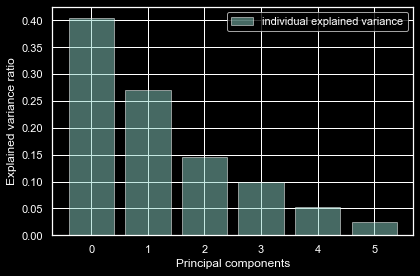

In [26]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
sc = StandardScaler()
y_train = y_train.to_numpy(dtype='int')
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
lda = LinearDiscriminantAnalysis()
X_train = lda.fit_transform(X_train,y_train)
X_test = lda.transform(X_test)
explained_variance = lda.explained_variance_ratio_
print(explained_variance)
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))
    plt.bar(range(6), explained_variance, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

Explained Variance Ratio of  1  Components:
[0.40495426]


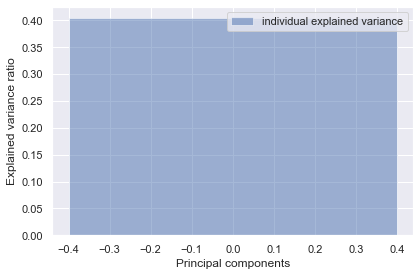


 Multi Linear Regression From PCA
R-Squared Value:  -0.019075716830398326
Adjusted R-Squared:  -0.022182654991466544
RMSE:  1.7225102796046785

 Voting Regression From LDA
R-Squared Value:  -0.18541089002361444
Adjusted R-Squared:  -0.18902494761514976
RMSE:  1.8577747342036208

 Random Forest Regression From LDA
R-Squared Value:  -0.43588818547022834
Adjusted R-Squared:  -0.44026589335275945
RMSE:  2.0446496706667325

 Support Vector Regression From LDA
R-Squared Value:  -0.07832902338318948
Adjusted R-Squared:  -0.08161661186911373
RMSE:  1.771879742861635
Explained Variance Ratio of  2  Components:
[0.40495426 0.27110729]


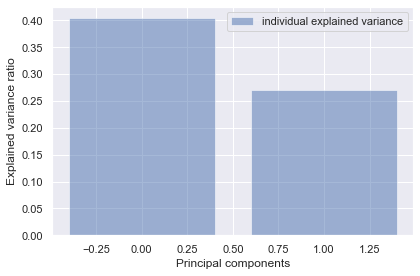


 Multi Linear Regression From PCA
R-Squared Value:  -0.04142424259414912
Adjusted R-Squared:  -0.047793809827140876
RMSE:  1.74129533842451

 Voting Regression From LDA
R-Squared Value:  -0.11562075400635385
Adjusted R-Squared:  -0.12244412253238668
RMSE:  1.802257694165958

 Random Forest Regression From LDA
R-Squared Value:  -0.18451796903602413
Adjusted R-Squared:  -0.19176272725642796
RMSE:  1.8570749099624715

 Support Vector Regression From LDA
R-Squared Value:  -0.10543556810683063
Adjusted R-Squared:  -0.11219664191788148
RMSE:  1.7940118729570462
Explained Variance Ratio of  3  Components:
[0.40495426 0.27110729 0.14590956]


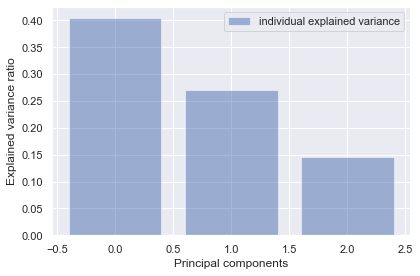


 Multi Linear Regression From PCA
R-Squared Value:  -0.042859477854205075
Adjusted R-Squared:  -0.05245634421482648
RMSE:  1.742494805415673

 Voting Regression From LDA
R-Squared Value:  -0.12823816355107698
Adjusted R-Squared:  -0.13862072333835695
RMSE:  1.812420596238615

 Random Forest Regression From LDA
R-Squared Value:  -0.18220977220778867
Adjusted R-Squared:  -0.1930890032403758
RMSE:  1.855264644195

 Support Vector Regression From LDA
R-Squared Value:  -0.11826962644584205
Adjusted R-Squared:  -0.12856045122908588
RMSE:  1.8043960195427988
Explained Variance Ratio of  4  Components:
[0.40495426 0.27110729 0.14590956 0.09966119]


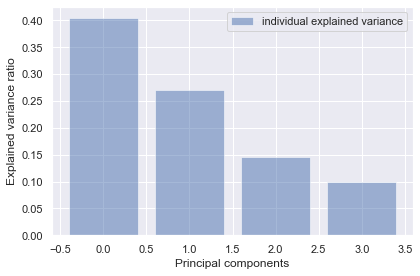


 Multi Linear Regression From PCA
R-Squared Value:  -0.04214987772484213
Adjusted R-Squared:  -0.054976337758378735
RMSE:  1.7419018756044506

 Voting Regression From LDA
R-Squared Value:  -0.11174788583787376
Adjusted R-Squared:  -0.12543093674049377
RMSE:  1.7991267132123971

 Random Forest Regression From LDA
R-Squared Value:  -0.11257335153078918
Adjusted R-Squared:  -0.12626656201116804
RMSE:  1.7997945093142096

 Support Vector Regression From LDA
R-Squared Value:  -0.1312374829157401
Adjusted R-Squared:  -0.14516040578239542
RMSE:  1.8148280756003645
Explained Variance Ratio of  5  Components:
[0.40495426 0.27110729 0.14590956 0.09966119 0.05300736]


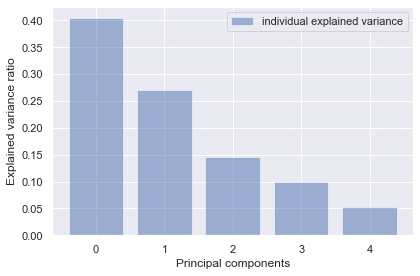


 Multi Linear Regression From PCA
R-Squared Value:  -0.042139339030965006
Adjusted R-Squared:  -0.0582217362382329
RMSE:  1.7418930681299054

 Voting Regression From LDA
R-Squared Value:  -0.11035907725129857
Adjusted R-Squared:  -0.12749424819653465
RMSE:  1.7980026168769168

 Random Forest Regression From LDA
R-Squared Value:  -0.11269616221576939
Adjusted R-Squared:  -0.12986739928700053
RMSE:  1.7998938411456216

 Support Vector Regression From LDA
R-Squared Value:  -0.15133357538141912
Adjusted R-Squared:  -0.16910106882866316
RMSE:  1.8308770495904174
Explained Variance Ratio of  6  Components:
[0.40495426 0.27110729 0.14590956 0.09966119 0.05300736 0.02536034]


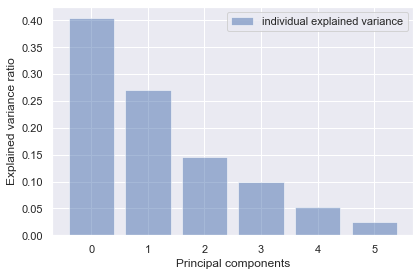


 Multi Linear Regression From PCA
R-Squared Value:  -0.04265106691304932
Adjusted R-Squared:  -0.06201919818697599
RMSE:  1.742320681703122

 Voting Regression From LDA
R-Squared Value:  -0.11092194801694322
Adjusted R-Squared:  -0.13155826903273793
RMSE:  1.7984582869861998

 Random Forest Regression From LDA
R-Squared Value:  -0.11447863239263989
Adjusted R-Squared:  -0.13518102184884984
RMSE:  1.8013349233445193

 Support Vector Regression From LDA
R-Squared Value:  -0.17449000836807071
Adjusted R-Squared:  -0.19630716022630113
RMSE:  1.8491973358792675


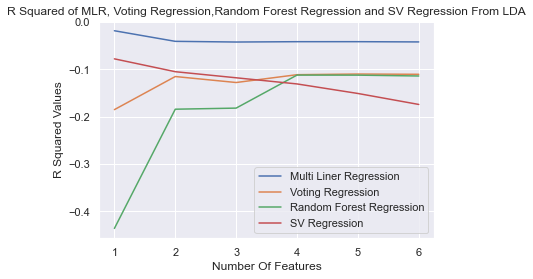

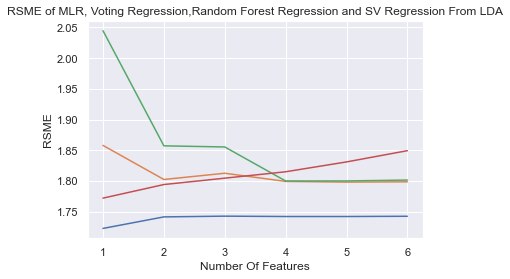

In [27]:
def select_features_lda(X_train, X_test,y_train,n):
    global lda
    # configure to select a subset of features
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    y_train = y_train.to_numpy(dtype='int')
    lda = LinearDiscriminantAnalysis(n_components = n)
    X_train_fs = lda.fit_transform(X_train,y_train)
    X_test_fs = lda.transform(X_test)
    return X_train_fs, X_test_fs
 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# feature selection
rsqMLR = []
rmseMLR = []
rsqVR = []
rmseVR = []
rsqRF = []
rmseRF = []
rsqSV = []
rmseSV = []

for n in range(1,7,1):
    X_train_fs, X_test_fs = select_features_lda(X_train, X_test,y_train,n)
    print ("Explained Variance Ratio of ",n," Components:")
    explained_variance = lda.explained_variance_ratio_
    print(explained_variance)
    
    plt.figure(figsize=(6, 4))
    plt.bar(range(n), explained_variance, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    
        # fit the model
    
    print ("\n Multi Linear Regression From PCA")
    LinearReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqMLR.append(r2)
    rmseMLR.append(rmse)
    
    print ("\n Voting Regression From LDA")
    VotingReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqVR.append(r2)
    rmseVR.append(rmse)
    
    print("\n Random Forest Regression From LDA")
    RandomForestReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqRF.append(r2)
    rmseRF.append(rmse)
    
    print("\n Support Vector Regression From LDA")
    SupportVectorRegression(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqSV.append(r2)
    rmseSV.append(rmse)


x = [1,2,3,4,5,6]
y1 = rsqMLR
plt.plot(x, y1,label = "Multi Liner Regression")
y2 = rsqVR
plt.plot(x, y2,label = "Voting Regression")
y3 = rsqRF
plt.plot(x, y3,label = "Random Forest Regression")
y4 = rsqSV
plt.plot(x, y4,label = "SV Regression")

plt.xlabel('Number Of Features')
plt.ylabel('R Squared Values')
plt.title('R Squared of MLR, Voting Regression,Random Forest Regression and SV Regression From LDA')
plt.legend()
plt.show()


x1 = [1,2,3,4,5,6]
y5 = rmseMLR
plt.plot(x1, y5,label = "Multi Liner Regression")
y6 = rmseVR
plt.plot(x1, y6,label = "Voting Regression")
y7 = rmseRF
plt.plot(x, y7,label = "Random Forest Regression")
y8 = rmseSV
plt.plot(x, y8,label = "SV Regression")

plt.xlabel('Number Of Features')
plt.ylabel('RSME')
plt.title('RSME of MLR, Voting Regression,Random Forest Regression and SV Regression From LDA')
plt.show()


#### Interpretation
Random Forest Regression performs well on less features.

- Different Algorithms Predictions Using TSNE

C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(



 Multi Linear Regression From TSNE
R-Squared Value:  -0.0014774554528835804
Adjusted R-Squared:  -0.004530740378044795
RMSE:  1.7075726275854555

 Voting Regression From TSNE
R-Squared Value:  -0.264364884523266
Adjusted R-Squared:  -0.26821965551266613
RMSE:  1.9186458058445932

 Random Forest Regression From TSNE
R-Squared Value:  -0.5603781230737241
Adjusted R-Squared:  -0.5651353734489488
RMSE:  2.1314420143663444

 Support Vector Regression From TSNE
R-Squared Value:  -0.042884348555747076
Adjusted R-Squared:  -0.046063874008660965
RMSE:  1.7425155832916888


C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(



 Multi Linear Regression From TSNE
R-Squared Value:  -0.0017937223178403627
Adjusted R-Squared:  -0.007920901047613116
RMSE:  1.7078422322622882

 Voting Regression From TSNE
R-Squared Value:  -0.17802975778602348
Adjusted R-Squared:  -0.18523483275719177
RMSE:  1.8519818511204909

 Random Forest Regression From TSNE
R-Squared Value:  -0.17964989444987967
Adjusted R-Squared:  -0.1868648785137934
RMSE:  1.853254922856246

 Support Vector Regression From TSNE
R-Squared Value:  -0.06354902509063587
Adjusted R-Squared:  -0.07005391209424827
RMSE:  1.7596948084186652


C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Hp\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(



 Multi Linear Regression From TSNE
R-Squared Value:  -1.3320512930792763
Adjusted R-Squared:  -1.353511887800865
RMSE:  2.6057193920370465

 Voting Regression From TSNE
R-Squared Value:  -0.09778755158131736
Adjusted R-Squared:  -0.10788989101304725
RMSE:  1.787795116849299

 Random Forest Regression From TSNE
R-Squared Value:  -0.09676264570307014
Adjusted R-Squared:  -0.10685555348561371
RMSE:  1.7869603699120928

 Support Vector Regression From TSNE
R-Squared Value:  -0.02586142440303907
Adjusted R-Squared:  -0.035301866958895145
RMSE:  1.7282355941861132


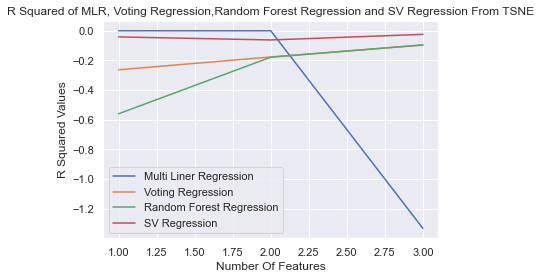

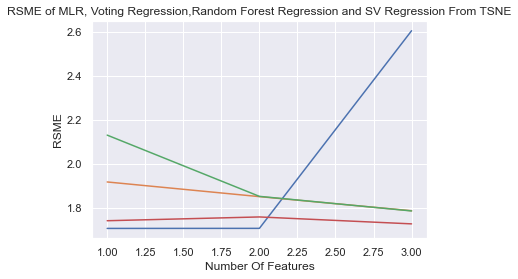

In [28]:
from sklearn.manifold import TSNE
def select_features(X_train, X_test,n):
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.transform(X_test)
    tsne = TSNE(n_components = n)
    X_train_fs = tsne.fit_transform(X_train)
    X_test_fs = tsne.fit_transform(X_test)
    return X_train_fs, X_test_fs
 

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
# feature selection
rsqMLR = []
rmseMLR = []
rsqVR = []
rmseVR = []
rsqRF = []
rmseRF = []
rsqSV = []
rmseSV = []
for n in range(1,4):
    X_train_fs, X_test_fs = select_features(X_train, X_test,n)
            # fit the model
    
    print ("\n Multi Linear Regression From TSNE")
    LinearReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqMLR.append(r2)
    rmseMLR.append(rmse)
    
    print ("\n Voting Regression From TSNE")
    VotingReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqVR.append(r2)
    rmseVR.append(rmse)
    
    print("\n Random Forest Regression From TSNE")
    RandomForestReg(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqRF.append(r2)
    rmseRF.append(rmse)
    
    print("\n Support Vector Regression From TSNE")
    SupportVectorRegression(X_train_fs,  X_test_fs, y_train, y_test, verbose=True, clf=None)
    rsqSV.append(r2)
    rmseSV.append(rmse)


x = [1,2,3]
y1 = rsqMLR
plt.plot(x, y1,label = "Multi Liner Regression")
y2 = rsqVR
plt.plot(x, y2,label = "Voting Regression")
y3 = rsqRF
plt.plot(x, y3,label = "Random Forest Regression")
y4 = rsqSV
plt.plot(x, y4,label = "SV Regression")

plt.xlabel('Number Of Features')
plt.ylabel('R Squared Values')
plt.title('R Squared of MLR, Voting Regression,Random Forest Regression and SV Regression From TSNE')
plt.legend()
plt.show()


x1 = [1,2,3]
y5 = rmseMLR
plt.plot(x1, y5,label = "Multi Liner Regression")
y6 = rmseVR
plt.plot(x1, y6,label = "Voting Regression")
y7 = rmseRF
plt.plot(x, y7,label = "Random Forest Regression")
y8 = rmseSV
plt.plot(x, y8,label = "SV Regression")

plt.xlabel('Number Of Features')
plt.ylabel('RSME')
plt.title('RSME of MLR, Voting Regression,Random Forest Regression and SV Regression From TSNE')
plt.show()


#### Interpretation
MLR performs worst in more components. VR and SV remains constant with number of components.
RF performs well at 2 components.

# MCMC

In [13]:
data.head(3)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,0,2,0,0,3,74.69,7,26.1415,548.9715,2,522.83,4.761905,26.1415,9.1
1,2,1,1,0,0,15.28,5,3.8200,80.2200,0,76.40,4.761905,3.8200,9.6
2,0,2,1,1,4,46.33,7,16.2155,340.5255,1,324.31,4.761905,16.2155,7.4


We first the correlation of columns with target variable.

In [16]:
rating = data['Rating']
data = data[['Branch', 'City','Customer type','Gender','Product line','Unit price','Quantity',
             'Tax 5%','Total','Payment','cogs','gross margin percentage','gross income']]
data['rating'] = rating
data.corr()['rating'].sort_values(ascending=False)

rating                     1.000000
City                       0.049585
Customer type              0.018889
Branch                     0.010238
Gender                     0.004800
Payment                   -0.005381
Unit price                -0.008778
Quantity                  -0.015815
Product line              -0.020529
cogs                      -0.036442
Tax 5%                    -0.036442
gross income              -0.036442
Total                     -0.036442
gross margin percentage         NaN
Name: rating, dtype: float64

In [14]:
unitprice = data['Unit price']

In [18]:
from scipy.stats import linregress

result = linregress(unitprice,rating)


In [34]:
pd.DataFrame([result.slope, result.intercept],
             index=['Slope', 'Intercept'],
             columns=[''])

,
Slope,-0.000569
Intercept,7.004397


# Simple Bayseian Linear Regression [One Independent Variable]

As we know linear regression line defines as
y = a + x*b

In [35]:
import pymc3 as pm

x_data = unitprice
y_data = rating

with pm.Model() as model3:
    a = pm.Uniform('a', 0, 4)
    b = pm.Uniform('b', -4, 4)
    sigma = pm.Uniform('sigma', 0, 2)

    y_est = a * x_data + b
    y = pm.Normal('y', 
                  mu=y_est, sd=sigma, 
                  observed=y_data)

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (theano.gof.compilelock): Overriding existing lock by dead process '20328' (I am process '24384')


In [36]:
with model3:
    trace3 = pm.sample(500, tune=1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, b, a]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 3000/3000 [00:29<00:00, 100.16draws/s]
The acceptance probability does not match the target. It is 0.928589430196879, but should be close to 0.8. Try to increase the number of tuning steps.


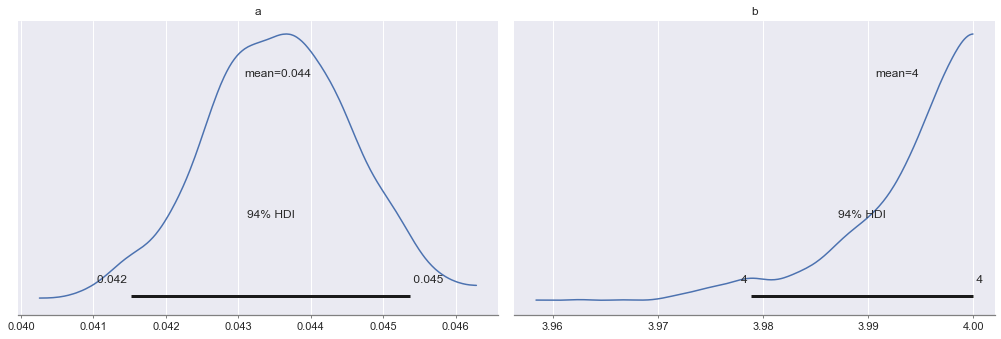

In [37]:
import arviz as az

with model3:
    az.plot_posterior(trace3, var_names=['a', 'b']);

In [38]:
print('Sample mean:', trace3['a'].mean())
print('Regression slope:', result.slope)

Sample mean: 0.04355025286434737
Regression slope: -0.0005693550674098788


In [39]:
print('Sample mean:', trace3['b'].mean())
print('Regression intercept:', result.intercept)

Sample mean: 3.9927592019862357
Regression intercept: 7.004397209329001


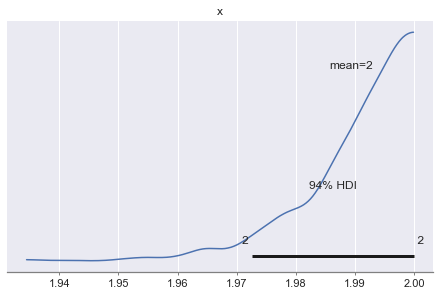

In [40]:
az.plot_posterior(trace3['sigma']);

# Implementing Bayesian Linear Regression [more than one independent variable]

In [15]:
columns = ['Rating','Branch', 'City','Customer type','Gender','Product line','Unit price','Quantity',
             'Tax 5%','Total','Payment','cogs','gross income']

subset = data[columns]

In [16]:
data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross margin percentage,gross income,Rating
0,0,2,0,0,3,74.69,7,26.1415,548.9715,2,522.83,4.761905,26.1415,9.1
1,2,1,1,0,0,15.28,5,3.8200,80.2200,0,76.40,4.761905,3.8200,9.6
2,0,2,1,1,4,46.33,7,16.2155,340.5255,1,324.31,4.761905,16.2155,7.4
3,0,2,0,1,3,58.22,8,23.2880,489.0480,2,465.76,4.761905,23.2880,8.4
4,0,2,1,1,5,86.31,7,30.2085,634.3785,2,604.17,4.761905,30.2085,5.3


In [63]:
standardized = (subset - subset.mean()) / subset.std()

In [64]:
y_data = standardized['rating']

In [65]:
x1 = standardized[columns[1]]
x2 = standardized[columns[2]]
x3 = standardized[columns[3]]
x4 = standardized[columns[4]]
x5 = standardized[columns[5]]
x6 = standardized[columns[6]]
x7 = standardized[columns[7]]
x8 = standardized[columns[8]]
x9 = standardized[columns[9]]
x10 = standardized[columns[10]]
x11 = standardized[columns[11]]
x12 = standardized[columns[12]]

In [66]:
with pm.Model() as model4:
    b0 = pm.Uniform('b0', -4, 4)
    b1 = pm.Uniform('b1', -4, 4)
    b2 = pm.Uniform('b2', -4, 4)
    b3 = pm.Uniform('b3', -4, 4)
    b4 = pm.Uniform('b4', -4, 4)
    b5 = pm.Uniform('b5', -4, 4)
    b6 = pm.Uniform('b6', -4, 4)
    b7 = pm.Uniform('b7', -4, 4)
    b8 = pm.Uniform('b8', -4, 4)
    b9 = pm.Uniform('b9', -4, 4)
    b10 = pm.Uniform('b10', -4, 4)
    b11 = pm.Uniform('b11', -4, 4)
    b12 = pm.Uniform('b12', -4, 4)
    sigma = pm.Uniform('sigma', 0, 2)

    y_est = b0 + b1*x1 + b2*x2 + b3*x3 + b4*x4 + b5*x5 + b6*x6 + b7*x7 + b8*x8 + b9*x9 + b10*x10 + b11*x11 + b12*x12
    y = pm.Normal('y', 
                  mu=y_est, sd=sigma, 
                  observed=y_data)

In [67]:
with model4:
    trace4 = pm.sample(500,tune=1000 )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sigma, b12, b11, b10, b9, b8, b7, b6, b5, b4, b3, b2, b1, b0]
Sampling 2 chains, 8 divergences: 100%|█████████████████████████████████████████| 3000/3000 [07:21<00:00,  6.79draws/s]
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.


In [68]:
param_names = ['b1', 'b3', 'b3', 'b4', 'b5', 'b6', 'b7','b8', 'b10','b11','b12']

means = [trace4[name].mean() 
         for name in param_names]

In [69]:
def credible_interval(sample):
    """Compute 94% credible interval."""
    ci = np.percentile(sample, [3, 97])
    return np.round(ci, 3)

cis = [credible_interval(trace4[name])
       for name in param_names]

In [84]:
index = columns[1:]
table = pd.DataFrame({'Variables' : ['rating','Branch', 'City','Customer type','Gender','Product line','Unit price','Quantity',
             'Tax 5%','Total','Payment','cogs','gross income']})
table['Posterior mean'] = pd.Series(np.round(means, 3))
table['94% CI'] = pd.Series(cis)
table

,Variables,Posterior mean,94% CI
0,rating,0.051,"[-0.02, 0.114]"
1,Branch,0.019,"[-0.041, 0.081]"
2,City,0.019,"[-0.041, 0.081]"
3,Customer type,0.005,"[-0.058, 0.067]"
4,Gender,-0.015,"[-0.077, 0.044]"
5,Product line,0.108,"[-0.012, 0.25]"
6,Unit price,0.114,"[-0.025, 0.254]"
7,Quantity,0.035,"[-3.72, 3.64]"
8,Tax 5%,-0.005,"[-0.065, 0.058]"
9,Total,-0.130,"[-3.754, 3.756]"


In [17]:
data = data.rename(columns={'Branch':'branch','Tax 5%': 'tax','City':'city','Customer type':'customertype','Gender':'gender','Product line':'productline','Unit price':'unitprice','Quantity':'quantity','Total':'total','Payment':'payment','gross margin percentage':'grossmarginpercentage','gross income':'grossincome'})
labels = data['Rating']
X_train, X_test, y_train, y_test = train_test_split(data, labels, 
                                                        test_size = 0.25,
                                                        random_state=42)

In [18]:
X_train

,branch,city,customertype,gender,productline,unitprice,quantity,tax,total,payment,cogs,grossmarginpercentage,grossincome,Rating
82,2,1,1,1,2,19.25,8,7.7000,161.7000,2,154.00,4.761905,7.7000,6.6
991,1,0,1,0,5,76.60,10,38.3000,804.3000,2,766.00,4.761905,38.3000,6.0
789,0,2,1,1,5,58.91,7,20.6185,432.9885,2,412.37,4.761905,20.6185,9.7
894,1,0,0,1,0,50.45,6,15.1350,317.8350,1,302.70,4.761905,15.1350,8.9
398,1,0,0,0,3,41.06,6,12.3180,258.6780,1,246.36,4.761905,12.3180,8.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,2,1,1,1,1,27.38,6,8.2140,172.4940,1,164.28,4.761905,8.2140,7.9
270,1,0,1,0,5,67.43,5,16.8575,354.0075,2,337.15,4.761905,16.8575,6.3
860,2,1,0,0,4,86.27,1,4.3135,90.5835,2,86.27,4.761905,4.3135,7.0
435,2,1,1,1,5,99.24,9,44.6580,937.8180,2,893.16,4.761905,44.6580,9.0


In [124]:
formula = 'rating ~ ' + ' + '.join(['%s' % variable for variable in X_train.columns[0:-1]])
formula

'rating ~ branch + city + customertype + gender + productline + unitprice + quantity + tax + total + payment + cogs + grossmarginpercentage + grossincome'

In [131]:
with pm.Model() as normal_model:
    
    # The prior for the data likelihood is a Normal Distribution
    family = pm.glm.families.Normal()
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = X_train, family = family)
    
    # Perform Markov Chain Monte Carlo sampling letting PyMC3 choose the algorithm
    normal_trace = pm.sample(1000, tune = 1000, init = 'adapt_diag')

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, grossincome, grossmarginpercentage, cogs, payment, total, tax, quantity, unitprice, productline, gender, customertype, city, branch, Intercept]
Sampling 2 chains, 33 divergences: 100%|████████████████████████████████████████| 4000/4000 [23:33<00:00,  2.83draws/s]
The acceptance probability does not match the target. It is 0.8870646711628256, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
There were 33 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.42956890149135984, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat

The model has lot of divergences. Lets improve the model.

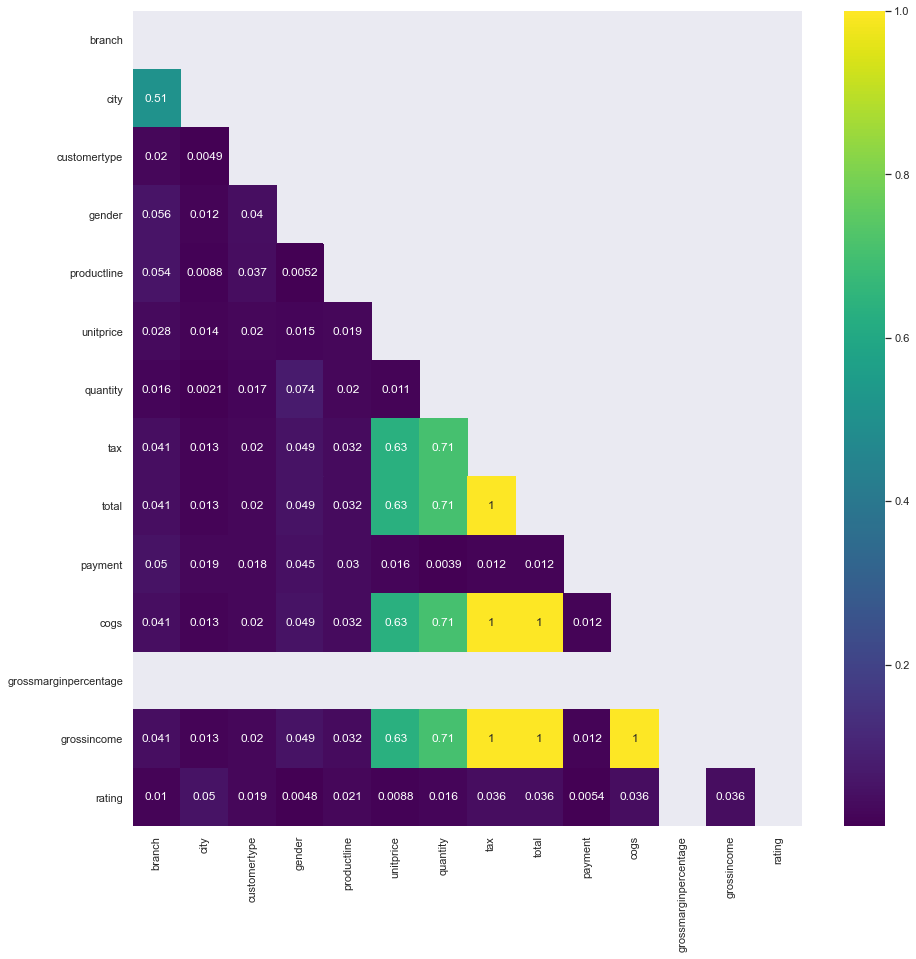

In [132]:
plt.figure(figsize=(15, 15))
corr = data.corr() 
mask = np.tri(*corr.shape).T 
sns.heatmap(corr.abs(), mask=mask, annot=True, cmap='viridis');

Remove columns with high correlation with other columns.

In [133]:
with pm.Model() as normal_model:
    
    # The prior for the data likelihood is a Normal Distribution
    family = pm.glm.families.Normal()
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula('rating ~ branch + city + customertype + gender + productline + unitprice + quantity + payment + grossmarginpercentage + grossincome', data = X_train, family = family)
    
    # Perform Markov Chain Monte Carlo sampling letting PyMC3 choose the algorithm
    normal_trace = pm.sample(1000, tune = 1000, init = 'adapt_diag')

Auto-assigning NUTS sampler...
Initializing NUTS using adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, grossincome, grossmarginpercentage, payment, quantity, unitprice, productline, gender, customertype, city, branch, Intercept]
Sampling 2 chains, 0 divergences: 100%|█████████████████████████████████████████| 4000/4000 [21:19<00:00,  3.13draws/s]
The acceptance probability does not match the target. It is 0.6553442713121381, but should be close to 0.8. Try to increase the number of tuning steps.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The chain reached the maximum tree depth. Increase max_treedepth, increase target_accept or reparameterize.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Wow zero divergences!

In [134]:
# Shows the trace with a vertical line at the mean of the trace
def plot_trace(trace):
    # Traceplot with vertical lines at the mean value
    ax = pm.traceplot(trace, figsize=(14, len(trace.varnames)*1.8),
                      lines={k: v['mean'] for k, v in pm.df_summary(trace).iterrows()})
    
    matplotlib.rcParams['font.size'] = 16
    
    # Labels with the median value
    for i, mn in enumerate(pm.df_summary(trace)['mean']):
        ax[i, 0].annotate('{:0.2f}'.format(mn), xy = (mn, 0), xycoords = 'data', size = 8,
                          xytext = (-18, 18), textcoords = 'offset points', rotation = 90,
                          va = 'bottom', fontsize = 'large', color = 'red')

C:\Users\Hp\anaconda\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


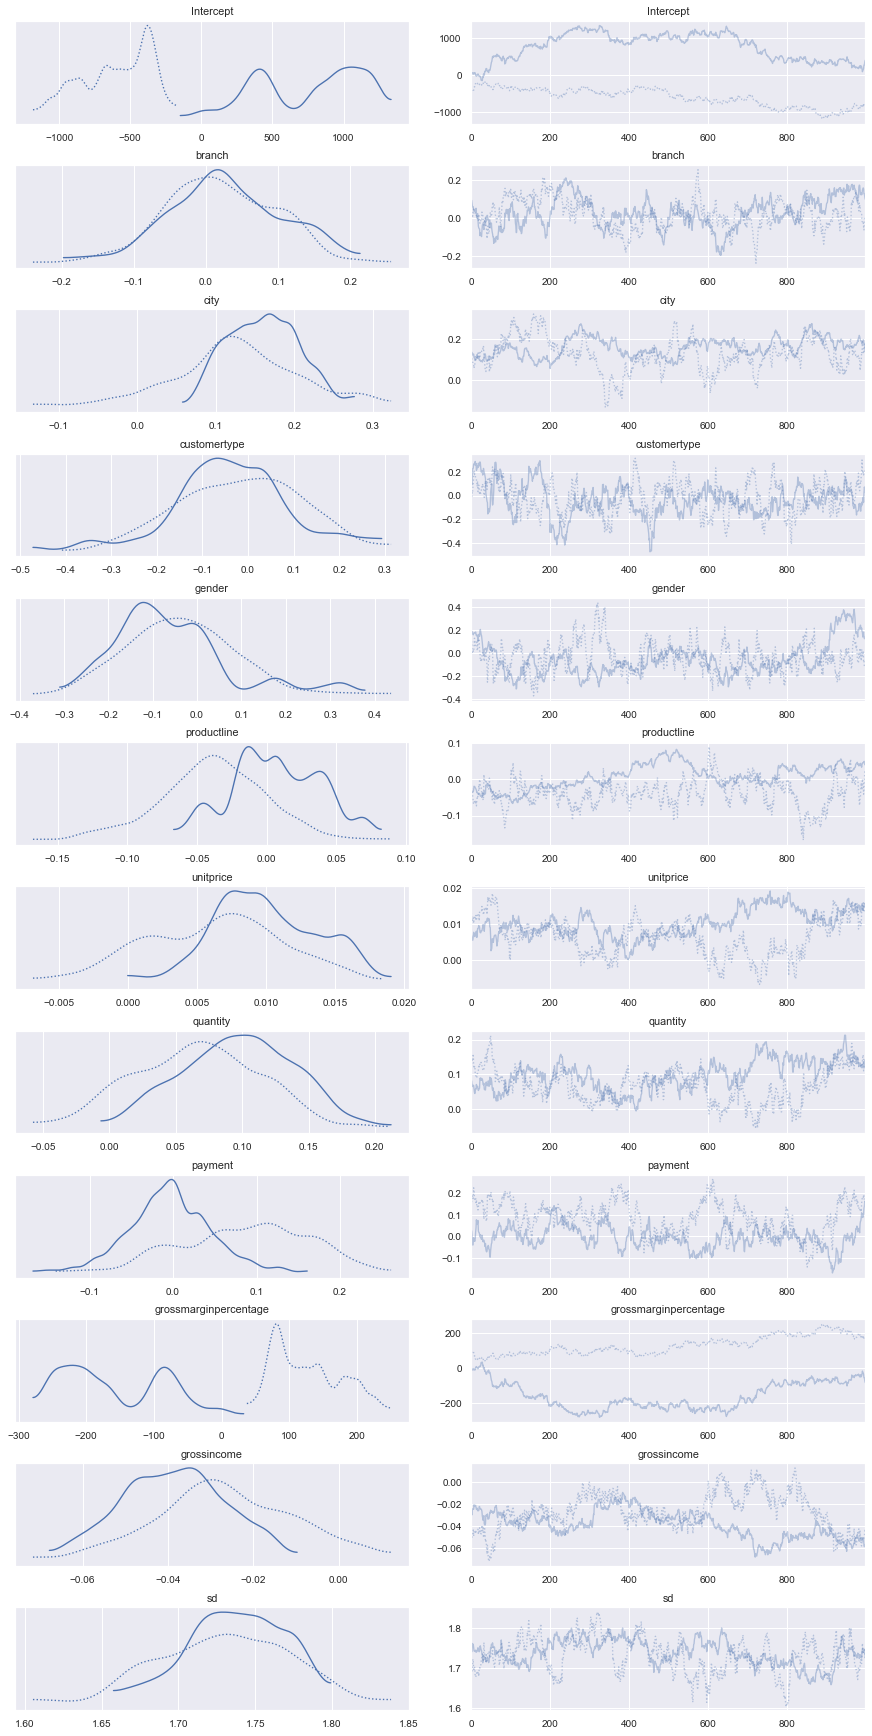

In [135]:
pm.traceplot(normal_trace);

C:\Users\Hp\anaconda\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


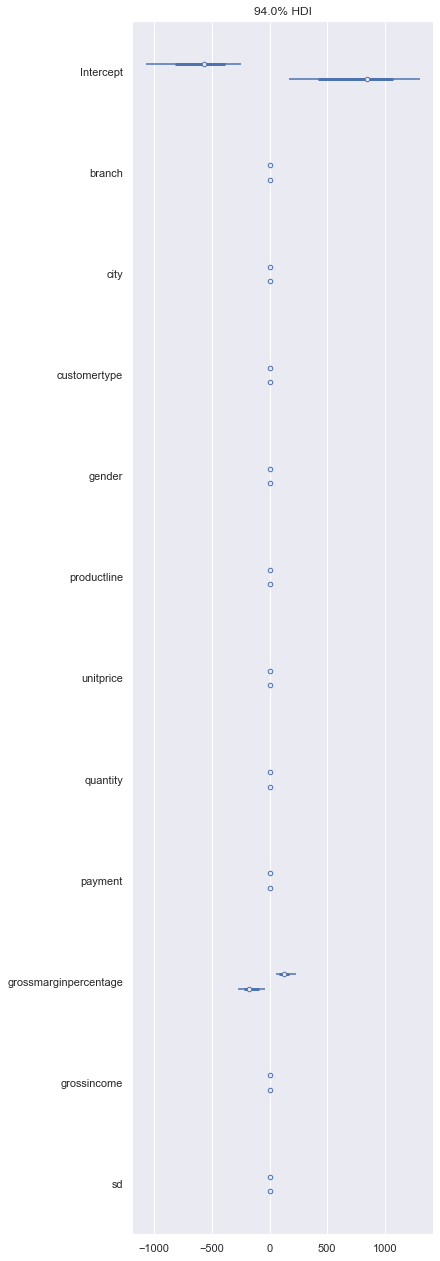

In [136]:
pm.forestplot(normal_trace);

Gross margin percentage has high uncertainity.

C:\Users\Hp\anaconda\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


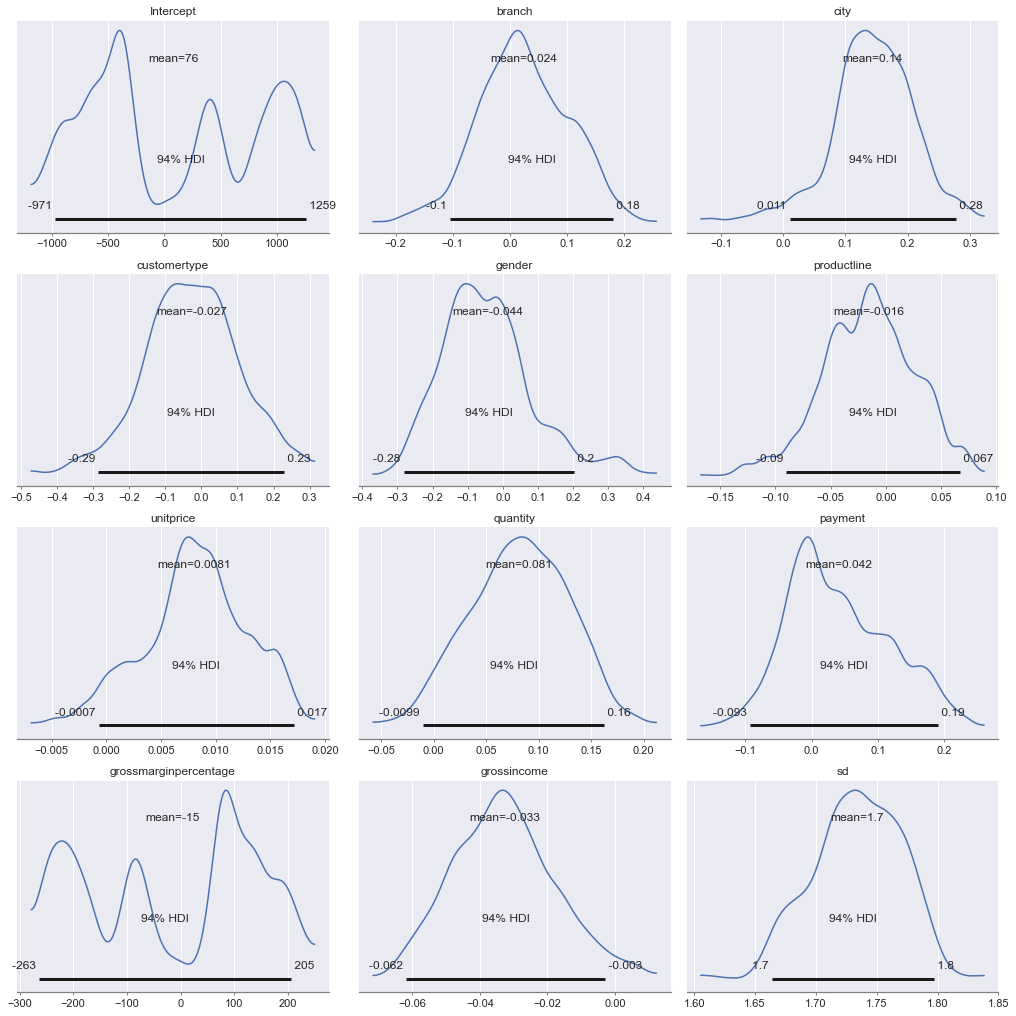

In [139]:
pm.plot_posterior(normal_trace, figsize = (14, 14));

In [140]:
# Print out the mean variable weight from the trace
for variable in normal_trace.varnames:
    print('Variable: {:15} Mean weight in model: {:.4f}'.format(variable, 
                                                                np.mean(normal_trace[variable])))

Variable: Intercept       Mean weight in model: 75.5760
Variable: branch          Mean weight in model: 0.0240
Variable: city            Mean weight in model: 0.1431
Variable: customertype    Mean weight in model: -0.0270
Variable: gender          Mean weight in model: -0.0445
Variable: productline     Mean weight in model: -0.0158
Variable: unitprice       Mean weight in model: 0.0081
Variable: quantity        Mean weight in model: 0.0813
Variable: payment         Mean weight in model: 0.0416
Variable: grossmarginpercentage Mean weight in model: -14.5134
Variable: grossincome     Mean weight in model: -0.0326
Variable: sd_log__        Mean weight in model: 0.5499
Variable: sd              Mean weight in model: 1.7334


#### Model Evaluation

In [233]:
var_dict = {}
for variable in normal_trace.varnames:
    var_dict[variable] = normal_trace[variable]

# Results into a dataframe
var_weights = pd.DataFrame(var_dict)

# Means for all the weights
var_means = var_weights.mean(axis=0)

# Create an intercept column

cols = X_test.columns.tolist()
cols = cols[-1:] + cols[:-1]
X_test = X_test[cols]
X_test['Intercept'] = 1


# Align names of the test observations and means
X_test = X_test.drop('cogs',axis = 1)
X_test = X_test.drop('tax', axis = 1)
X_test = X_test.drop('total', axis =1)
#X_test = X_test.drop('rating', axis =1)
        
names = X_test.columns[1:]

X_test_t = X_test.loc[:, names]

var_means = var_means[names]

# Calculate estimate for each test observation using the average weights
results = pd.DataFrame(index = X_test_t.index, columns = ['estimate'])

for row in X_test_t.iterrows():
    results.loc[row[0], 'estimate'] = np.dot(np.array(var_means), np.array(row[1]))

# Metrics 
actual = np.array(y_test)
errors = results['estimate'] - actual
mae = np.mean(abs(errors))
rmse = np.sqrt(np.mean(errors ** 2))

print('Model  MAE: {:.4f}\nModel RMSE: {:.4f}'.format(mae, rmse))
    


Model  MAE: 1.4875
Model RMSE: 1.7267


# Make Predictions

In [34]:
def test_model(trace, test_observation):
    
    # Print out the test observation data
    print('Test Observation:')
    print(test_observation)
    var_dict = {}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]

    # Results into a dataframe
    var_weights = pd.DataFrame(var_dict)
    
    # Standard deviation of the likelihood
    sd_value = var_weights['sd'].mean()

    # Actual Value
    actual = test_observation['rating']
    
    # Add in intercept term
    test_observation['Intercept'] = 1
    test_observation = test_observation.drop('rating')
    #test_observation = test_observation.drop('cogs')
    #test_observation = test_observation.drop('tax')
    #test_observation = test_observation.drop('total')
        
    
    # Align weights and test observation
    var_weights = var_weights[test_observation.index]

    # Means for all the weights
    var_means = var_weights.mean(axis=0)

    # Location of mean for observation
    mean_loc = np.dot(var_means, test_observation)
    
    # Estimates of grade
    estimates = np.random.normal(loc = mean_loc, scale = sd_value,
                                 size = 1000)

    # Plot all the estimates
    plt.figure(figsize(8, 8))
    sns.distplot(estimates, hist = True, kde = True, bins = 19,
                 hist_kws = {'edgecolor': 'k', 'color': 'darkblue'},
                kde_kws = {'linewidth' : 4},
                label = 'Estimated Dist.')
    # Plot the actual grade
    plt.vlines(x = actual, ymin = 0, ymax = 5, 
               linestyles = '--', colors = 'red',
               label = 'True Rating',
              linewidth = 2.5)
    
    # Plot the mean estimate
    plt.vlines(x = mean_loc, ymin = 0, ymax = 5, 
               linestyles = '-', colors = 'orange',
               label = 'Mean Estimate',
              linewidth = 2.5)
    
    plt.legend(loc = 1)
    plt.title('Density Plot for Test Observation');
    plt.xlabel('Rating'); plt.ylabel('Density');
    
    # Prediction information
    print('True Rating = %d' % actual)
    print('Average Estimate = %0.4f' % mean_loc)
    print('5%% Estimate = %0.4f    95%% Estimate = %0.4f' % (np.percentile(estimates, 5),
                                       np.percentile(estimates, 95)))

    
    

Test Observation:
rating                    5.100000
branch                    1.000000
city                      0.000000
customertype              1.000000
gender                    1.000000
productline               3.000000
unitprice                87.870000
quantity                 10.000000
payment                   2.000000
grossmarginpercentage     4.761905
grossincome              43.935000
Intercept                 1.000000
Name: 96, dtype: float64


<ipython-input-234-c5d815ef8039>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_observation['Intercept'] = 1
C:\Users\Hp\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


True Rating = 5
Average Estimate = 6.5425
5% Estimate = 3.8179    95% Estimate = 9.1775


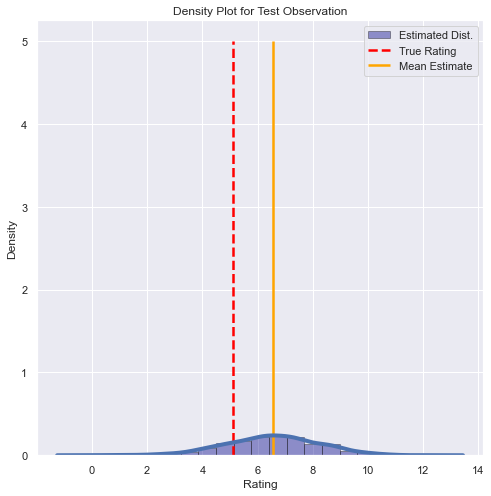

In [235]:
from IPython.core.pylabtools import figsize
test_model(normal_trace, X_test.iloc[41])

Test Observation:
rating                    6.400000
branch                    0.000000
city                      2.000000
customertype              1.000000
gender                    0.000000
productline               4.000000
unitprice                69.960000
quantity                  8.000000
payment                   1.000000
grossmarginpercentage     4.761905
grossincome              27.984000
Intercept                 1.000000
Name: 280, dtype: float64


<ipython-input-234-c5d815ef8039>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_observation['Intercept'] = 1
C:\Users\Hp\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


True Rating = 6
Average Estimate = 7.0049
5% Estimate = 4.1077    95% Estimate = 9.7384


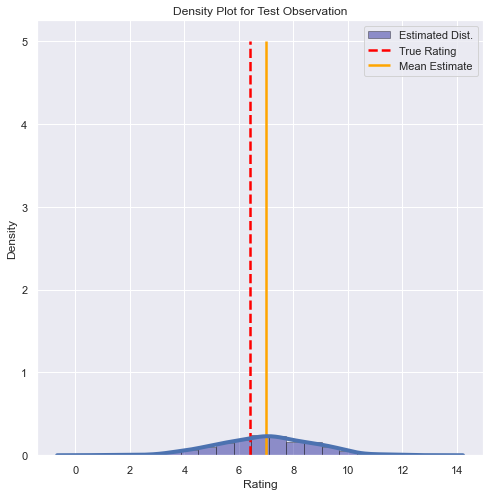

In [236]:
test_model(normal_trace, X_test.iloc[16])

#### Model Effect
The more spread out the lines, the less sure the model is about the effect of that variable.

In [42]:
def model_effect(query_var, trace, X):
    
    # Variables that do not change
    steady_vars = list(X.columns)
    steady_vars.remove(query_var)
    
    # Linear Model that estimates a grade based on the value of the query variable 
    # and one sample from the trace
    def lm(value, sample):
        
        # Prediction is the estimate given a value of the query variable
        prediction = sample['Intercept'] + sample[query_var] * value
        
        # Each non-query variable is assumed to be at the median value
        for var in steady_vars:
            
            # Multiply the weight by the median value of the variable
            prediction += sample[var] * X[var].median()
        
        return prediction
    
    figsize(6, 6)
    
    # Find the minimum and maximum values for the range of the query var
    var_min = X[query_var].min()
    var_max = X[query_var].max()
    
    # Plot the estimated grade versus the range of query variable
    pm.plot_posterior_predictive_glm(trace, eval=np.linspace(var_min, var_max, 100), 
                                     lm=lm, samples=100, color='blue', 
                                     alpha = 0.4, lw = 2)
    
    # Plot formatting
    plt.xlabel('%s' % query_var, size = 16)
    plt.ylabel('Rating', size = 16)
    plt.title("Posterior of Rating vs %s" % query_var, size = 18)
    plt.show()


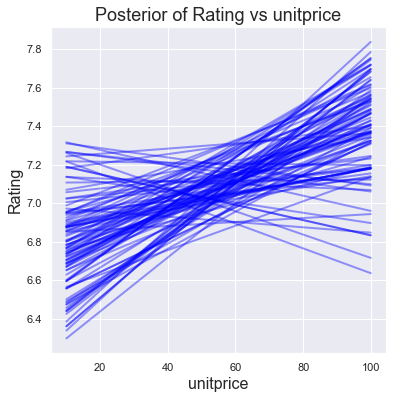

In [250]:
model_effect('unitprice', normal_trace, X_train.drop(columns=['rating','cogs','tax','total'],axis=1))

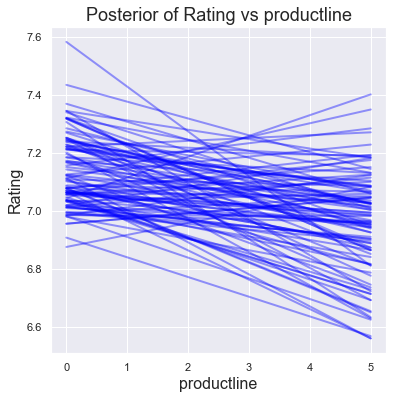

In [251]:
model_effect('productline', normal_trace, X_train.drop(columns=['rating','cogs','tax','total'],axis=1))

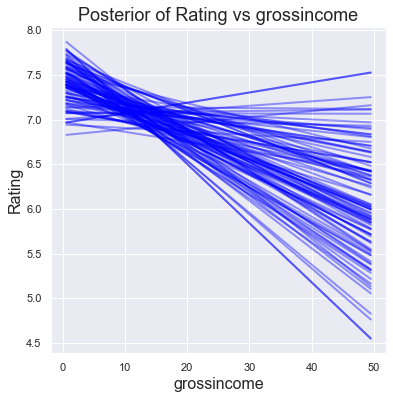

In [252]:
model_effect('grossincome', normal_trace, X_train.drop(columns=['rating','cogs','tax','total'],axis=1))

# Metropolis

In [26]:
import pymc3 as pm
with pm.Model() as normal_model_mh:
    
    # The prior for the data likelihood is a Normal Distribution
    family = pm.glm.families.Normal()
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula('Rating ~ branch + city + customertype + gender + productline + unitprice + quantity + payment + grossmarginpercentage + grossincome', data = X_train, family = family)
    sampler = pm.Metropolis()
    # Perform Markov Chain Monte Carlo sampling letting PyMC3 choose the algorithm
    normal_trace_mh = pm.sample(1000, step = sampler,tune = 1000)
    
    

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [sd]
>Metropolis: [grossincome]
>Metropolis: [grossmarginpercentage]
>Metropolis: [payment]
>Metropolis: [quantity]
>Metropolis: [unitprice]
>Metropolis: [productline]
>Metropolis: [gender]
>Metropolis: [customertype]
>Metropolis: [city]
>Metropolis: [branch]
>Metropolis: [Intercept]
Sampling 2 chains, 0 divergences: 100%|████████████████████████████████████████| 4000/4000 [00:10<00:00, 394.29draws/s]
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


In [27]:
# Shows the trace with a vertical line at the mean of the trace
def plot_trace(trace):
    # Traceplot with vertical lines at the mean value
    ax = pm.traceplot(trace, figsize=(14, len(trace.varnames)*1.8),
                      lines={k: v['mean'] for k, v in pm.df_summary(trace).iterrows()})
    
    matplotlib.rcParams['font.size'] = 16
    
    # Labels with the median value
    for i, mn in enumerate(pm.df_summary(trace)['mean']):
        ax[i, 0].annotate('{:0.2f}'.format(mn), xy = (mn, 0), xycoords = 'data', size = 8,
                          xytext = (-18, 18), textcoords = 'offset points', rotation = 90,
                          va = 'bottom', fontsize = 'large', color = 'red')

C:\Users\Hp\anaconda\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


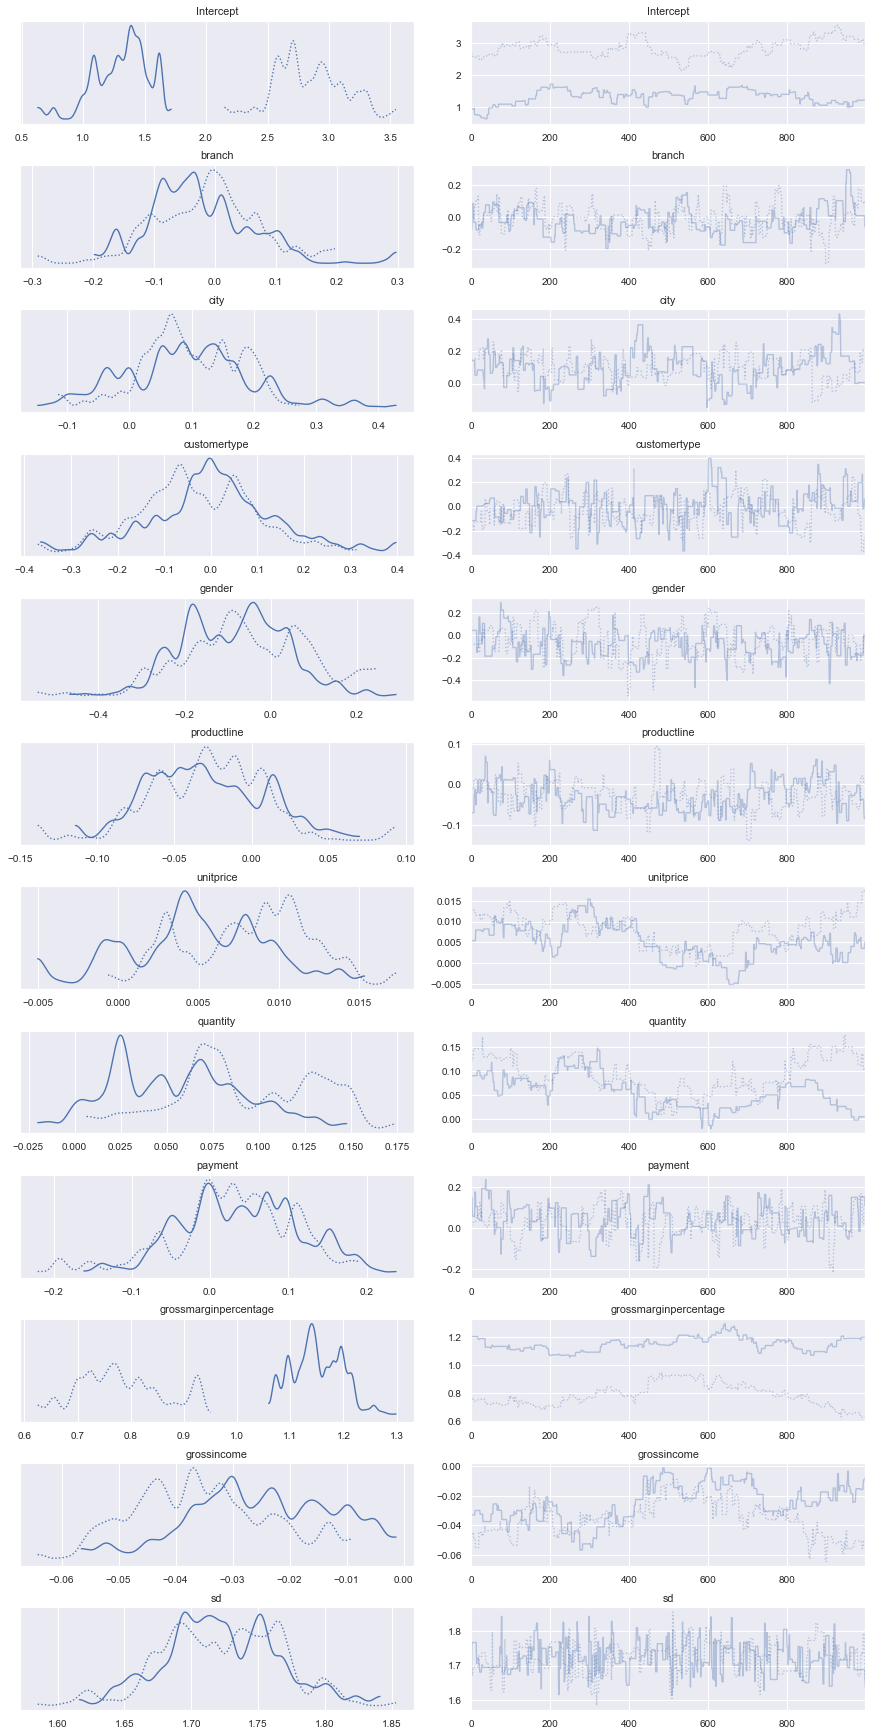

In [28]:
pm.traceplot(normal_trace_mh);

C:\Users\Hp\anaconda\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


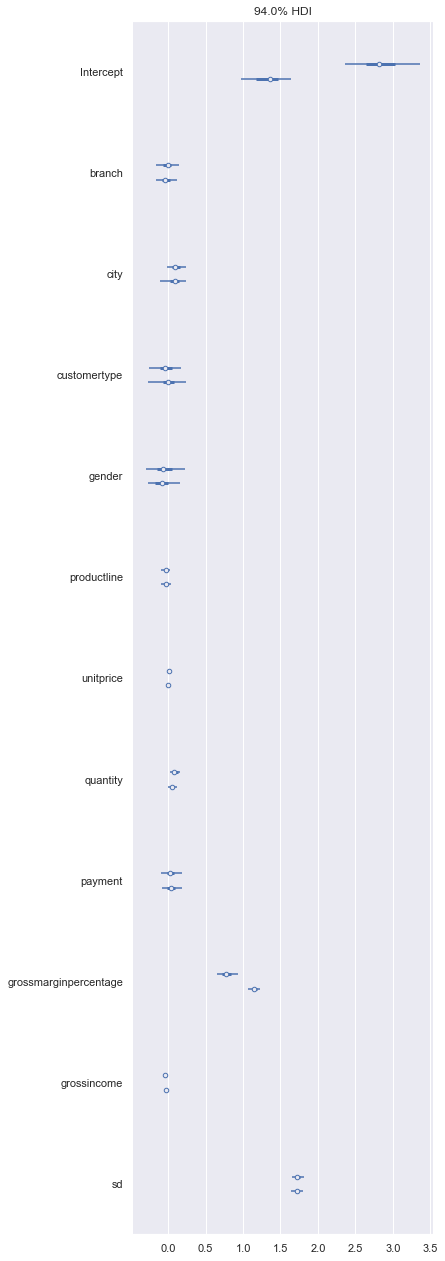

In [29]:
pm.forestplot(normal_trace_mh);

C:\Users\Hp\anaconda\lib\site-packages\arviz\data\io_pymc3.py:88: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


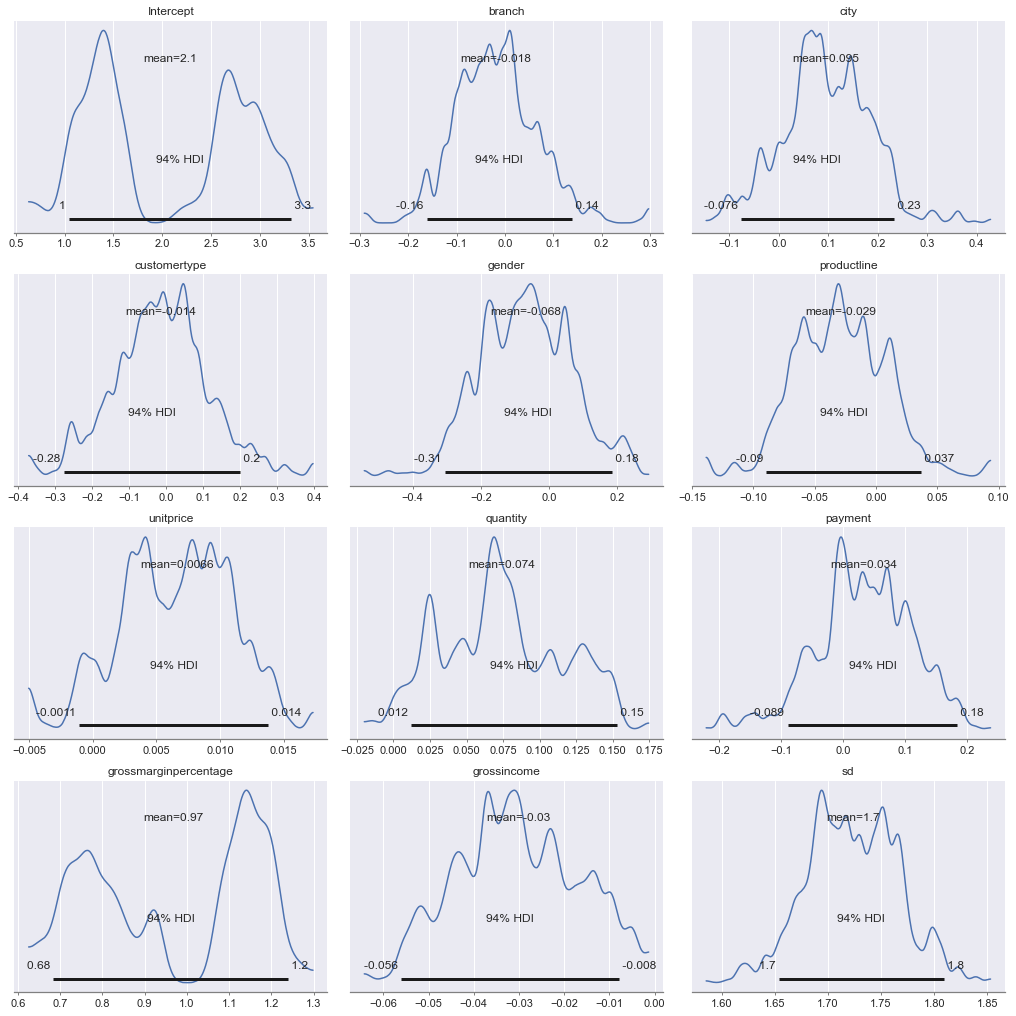

In [30]:
pm.plot_posterior(normal_trace_mh, figsize = (14, 14));

In [31]:
# Print out the mean variable weight from the trace
for variable in normal_trace_mh.varnames:
    print('Variable: {:15} Mean weight in model: {:.4f}'.format(variable, 
                                                                np.mean(normal_trace_mh[variable])))

Variable: Intercept       Mean weight in model: 2.0764
Variable: branch          Mean weight in model: -0.0183
Variable: city            Mean weight in model: 0.0953
Variable: customertype    Mean weight in model: -0.0138
Variable: gender          Mean weight in model: -0.0683
Variable: productline     Mean weight in model: -0.0287
Variable: unitprice       Mean weight in model: 0.0066
Variable: quantity        Mean weight in model: 0.0740
Variable: payment         Mean weight in model: 0.0337
Variable: grossmarginpercentage Mean weight in model: 0.9687
Variable: grossincome     Mean weight in model: -0.0302
Variable: sd_log__        Mean weight in model: 0.5439
Variable: sd              Mean weight in model: 1.7233


In [32]:
var_dict = {}
for variable in normal_trace_mh.varnames:
    var_dict[variable] = normal_trace_mh[variable]

# Results into a dataframe
var_weights = pd.DataFrame(var_dict)

# Means for all the weights
var_means = var_weights.mean(axis=0)

# Create an intercept column

cols = X_test.columns.tolist()
cols = cols[-1:] + cols[:-1]
X_test = X_test[cols]
X_test['Intercept'] = 1


# Align names of the test observations and means
X_test = X_test.drop('cogs',axis = 1)
X_test = X_test.drop('tax', axis = 1)
X_test = X_test.drop('total', axis =1)
#X_test = X_test.drop('rating', axis =1)
        
names = X_test.columns[1:]

X_test_t = X_test.loc[:, names]

var_means = var_means[names]

# Calculate estimate for each test observation using the average weights
results = pd.DataFrame(index = X_test_t.index, columns = ['estimate'])

for row in X_test_t.iterrows():
    results.loc[row[0], 'estimate'] = np.dot(np.array(var_means), np.array(row[1]))

# Metrics 
actual = np.array(y_test)
errors = results['estimate'] - actual
mae = np.mean(abs(errors))
rmse = np.sqrt(np.mean(errors ** 2))

print('Model  MAE: {:.4f}\nModel RMSE: {:.4f}'.format(mae, rmse))
    


Model  MAE: 1.4944
Model RMSE: 1.7322


In [39]:
def test_model(trace, test_observation):
    
    # Print out the test observation data
    print('Test Observation:')
    print(test_observation)
    var_dict = {}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]

    # Results into a dataframe
    var_weights = pd.DataFrame(var_dict)
    
    # Standard deviation of the likelihood
    sd_value = var_weights['sd'].mean()

    # Actual Value
    actual = test_observation['Rating']
    
    # Add in intercept term
    test_observation['Intercept'] = 1
    test_observation = test_observation.drop('Rating')
    #test_observation = test_observation.drop('cogs')
    #test_observation = test_observation.drop('tax')
    #test_observation = test_observation.drop('total')
        
    
    # Align weights and test observation
    var_weights = var_weights[test_observation.index]

    # Means for all the weights
    var_means = var_weights.mean(axis=0)

    # Location of mean for observation
    mean_loc = np.dot(var_means, test_observation)
    
    # Estimates of grade
    estimates = np.random.normal(loc = mean_loc, scale = sd_value,
                                 size = 1000)

    # Plot all the estimates
    plt.figure(figsize(8, 8))
    sns.distplot(estimates, hist = True, kde = True, bins = 19,
                 hist_kws = {'edgecolor': 'k', 'color': 'darkblue'},
                kde_kws = {'linewidth' : 4},
                label = 'Estimated Dist.')
    # Plot the actual grade
    plt.vlines(x = actual, ymin = 0, ymax = 5, 
               linestyles = '--', colors = 'red',
               label = 'True Rating',
              linewidth = 2.5)
    
    # Plot the mean estimate
    plt.vlines(x = mean_loc, ymin = 0, ymax = 5, 
               linestyles = '-', colors = 'orange',
               label = 'Mean Estimate',
              linewidth = 2.5)
    
    plt.legend(loc = 1)
    plt.title('Density Plot for Test Observation');
    plt.xlabel('Rating'); plt.ylabel('Density');
    
    # Prediction information
    print('True Rating = %d' % actual)
    print('Average Estimate = %0.4f' % mean_loc)
    print('5%% Estimate = %0.4f    95%% Estimate = %0.4f' % (np.percentile(estimates, 5),
                                       np.percentile(estimates, 95)))

    


Test Observation:
Rating                    5.100000
branch                    1.000000
city                      0.000000
customertype              1.000000
gender                    1.000000
productline               3.000000
unitprice                87.870000
quantity                 10.000000
payment                   2.000000
grossmarginpercentage     4.761905
grossincome              43.935000
Intercept                 1.000000
Name: 96, dtype: float64


<ipython-input-39-30b39cbf3024>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_observation['Intercept'] = 1
C:\Users\Hp\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


True Rating = 5
Average Estimate = 6.5622
5% Estimate = 3.6950    95% Estimate = 9.4115


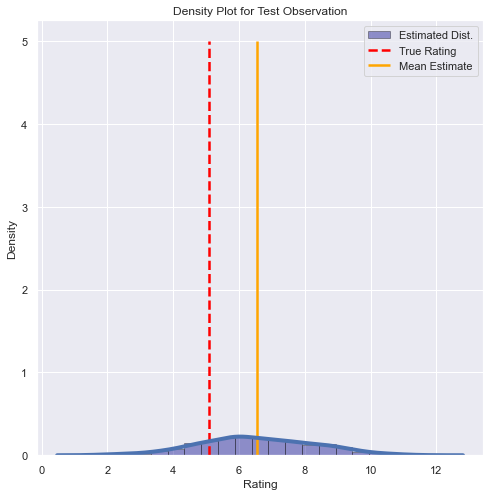

In [40]:
from IPython.core.pylabtools import figsize
test_model(normal_trace_mh, X_test.iloc[41])

NUTS
Model  MAE: 1.4875
Model RMSE: 1.7267

Metropolis
Model  MAE: 1.4944
Model RMSE: 1.7322